# Análisis

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from astropy.io import fits
import pandas as pd
#
#import sys
#sys.path.append('/home/jennifer/fits_plotting_tool')
#from fits_plotter import FITSPlotter

In [2]:
import sys
sys.path.append('/home/holman/FILES/fits_plotting_tool')
from fits_plotter2 import FITSPlotter

### Comparaciones entre las muestras analizadas

In [6]:
df = pd.read_csv("comparacion_muestras.csv")
df

Grupo de Muestras        Cube Size Image Size (arcsec²)  \
0       Líneas moleculares de M17-UC1  2430x2430x478x1            0.57x0.57   
1  Líneas de recombinación de M17-UC1  2430x2430x478x1            0.57x0.57   
2           Muestras de la nube M17SW   140x126x2043x1            1.17x1.05   

   Pixel Scale    Beam Size  
0        0.014  0.097x0.040  
1        0.014  0.098x0.043  
2        0.500  4.694x2.576

# M17 UC1 Analisys

## Emiisión del medio circundante

El gas molecular en la nube **M17SW** actúa como el reservorio de material en interacción con M17-UC1.

##### **Comparación de Velocidades**
Se compararán los gradientes de velocidad del gas molecular con los del gas ionizado en M17-UC1.

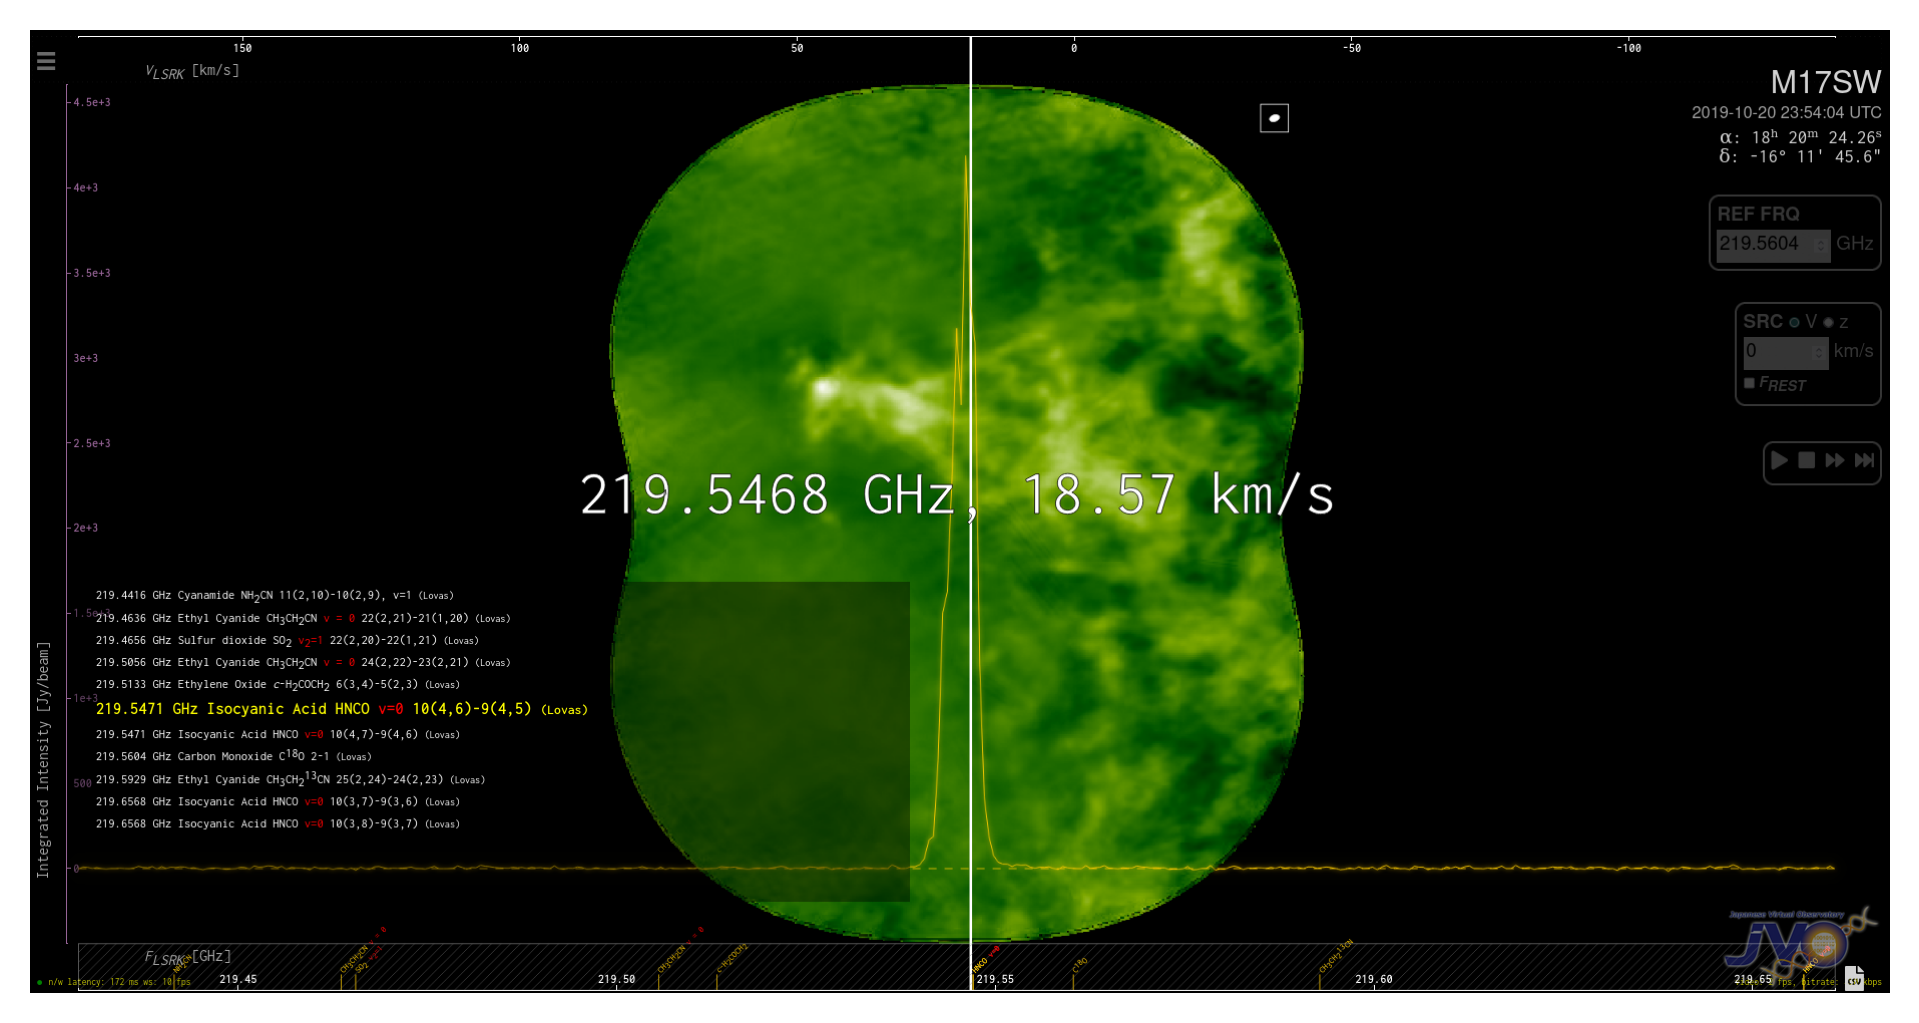

In [10]:
#Usé una muestra que presenta una línea marcada de HNCO


#############################
image_path = "images/0118.png"
img = mpimg.imread(image_path)
plt.figure(figsize=(8, 6))  # Ajustar tamaño
plt.imshow(img)
plt.axis("off")  # Ocultar ejes
plt.show()

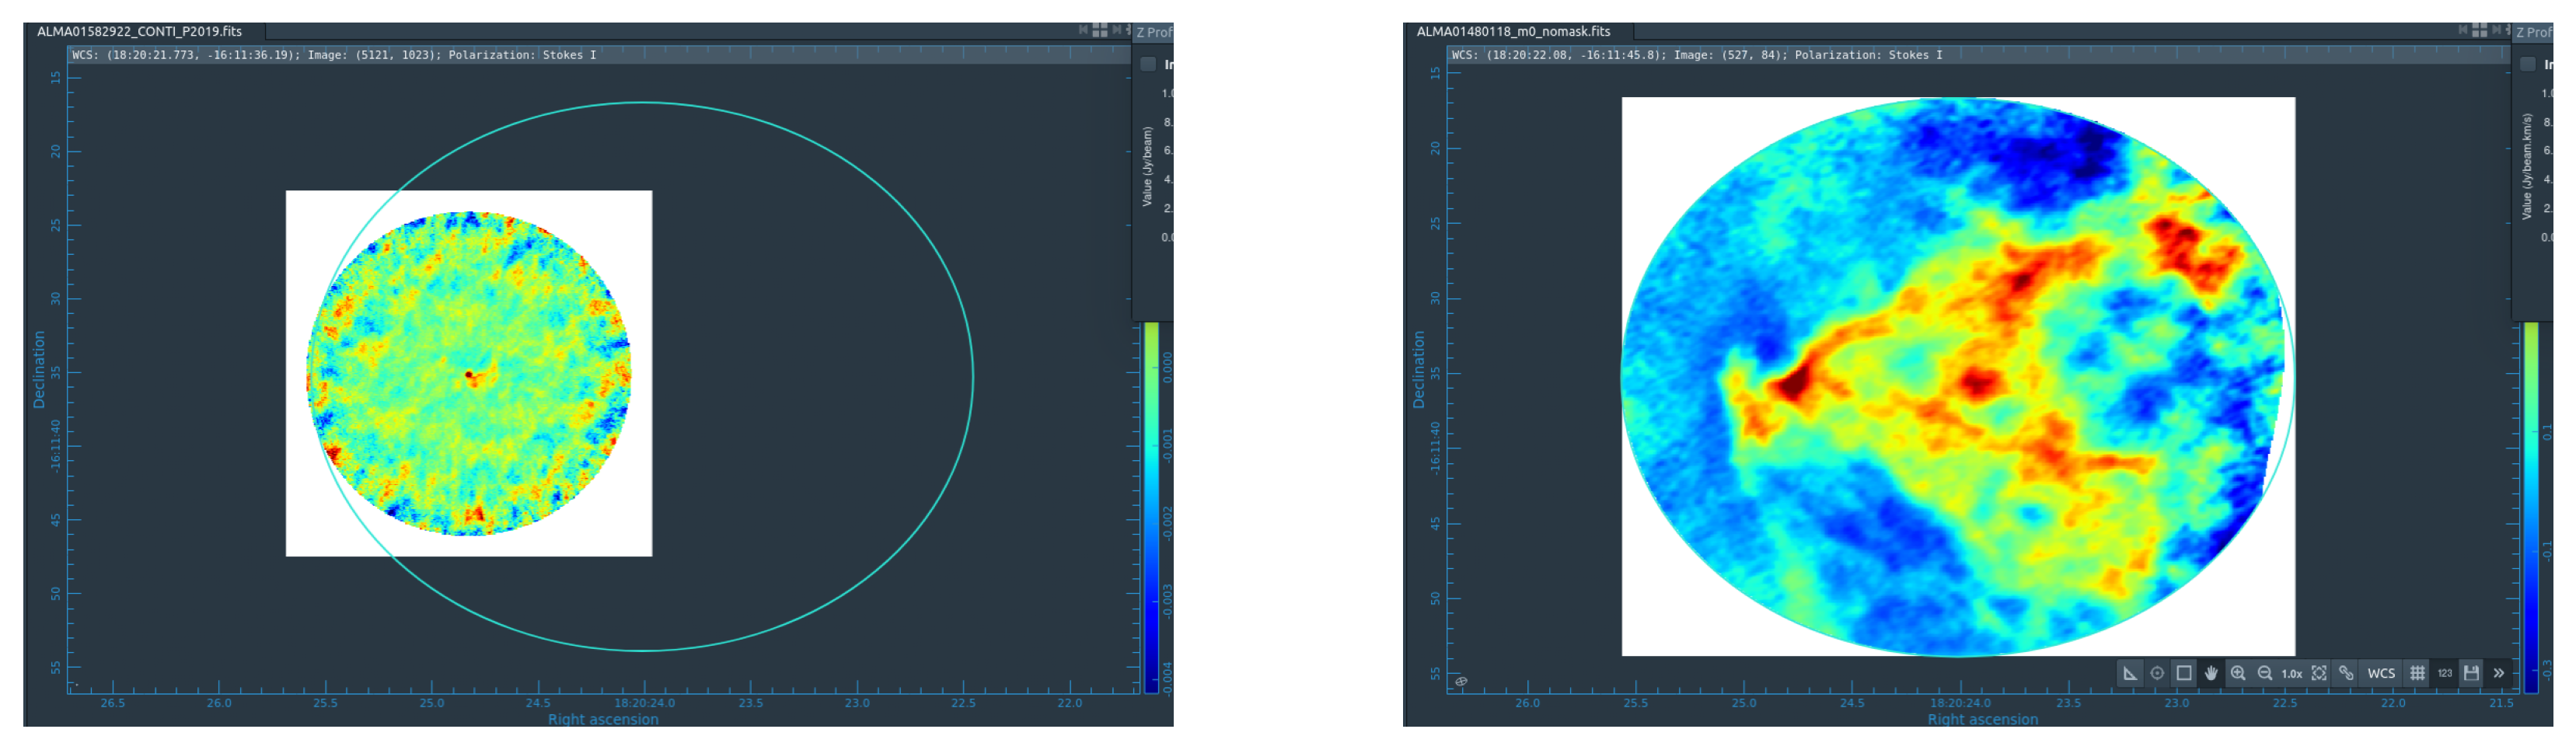

In [13]:
#Comparación entre las muestras de medio circundante y de la región hipercompacta
# Rutas de las imágenes
img1_path = "images/extend_comp1.png"
img2_path = "images/extend_comp2.png"

# Crear figura con 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 8))  # (1 fila, 2 columnas)

# Cargar y mostrar la primera imagen
img1 = mpimg.imread(img1_path)
axes[0].imshow(img1)
axes[0].axis("off")  # Ocultar ejes
#axes[0].set_title("Imagen 1")

# Cargar y mostrar la segunda imagen
img2 = mpimg.imread(img2_path)
axes[1].imshow(img2)
axes[1].axis("off")  # Ocultar ejes
#axes[1].set_title("Imagen 2")

plt.show()

### ALMA01480118: HNCO

- $\sigma$ promedio: 0.007918
- 3$\sigma$: 0.023755
- Se observa un gradiante de $8km/s$ si se usa una mask de 3$\sigma$

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


TypeError: WCS projection has 2 dimensions, so expected 2 (an Nx2 array and the origin argument) or 3 arguments (the position in each dimension, and the origin argument). Instead, 23 arguments were given.

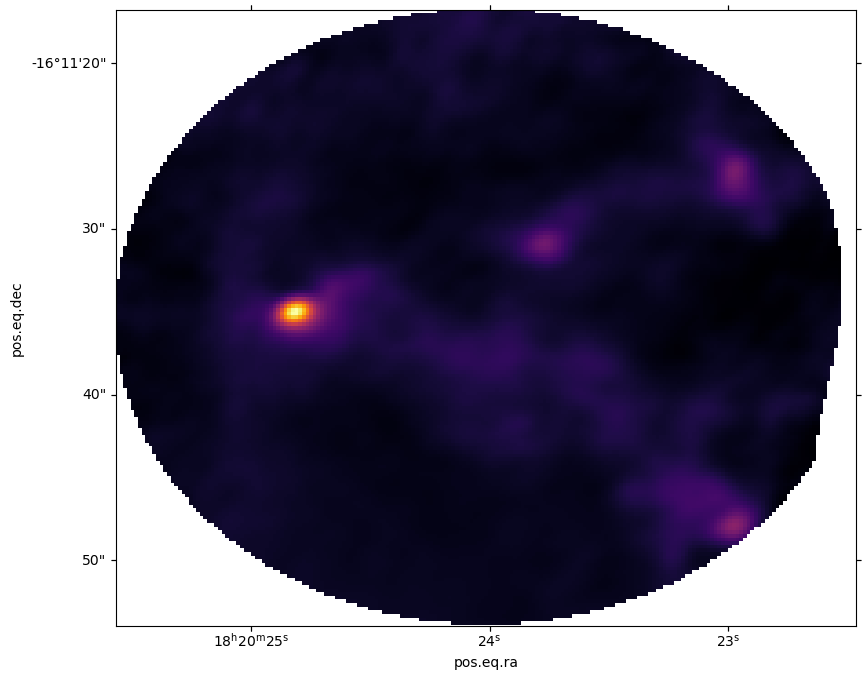

In [3]:
plotter = FITSPlotter(
    image_fits="/home/holman/FILES/M17_P2019/ALMA01507446_region_plot.fits",
    ref_coord="18:20:24 -16:11:35.075",  # Coordenadas en formato ICRS
    ref_label="UC1",
    moment="continuo")
plotter.plot()


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


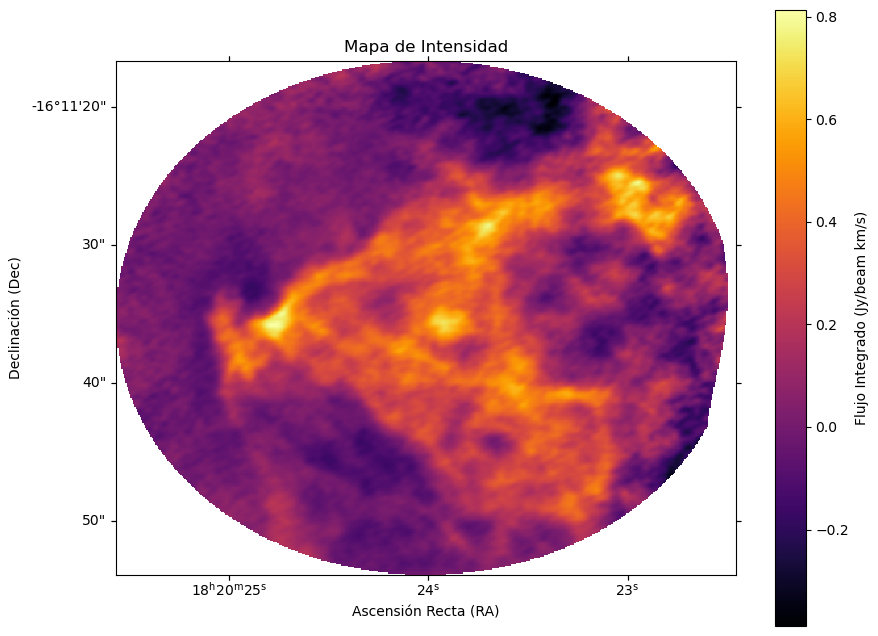

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


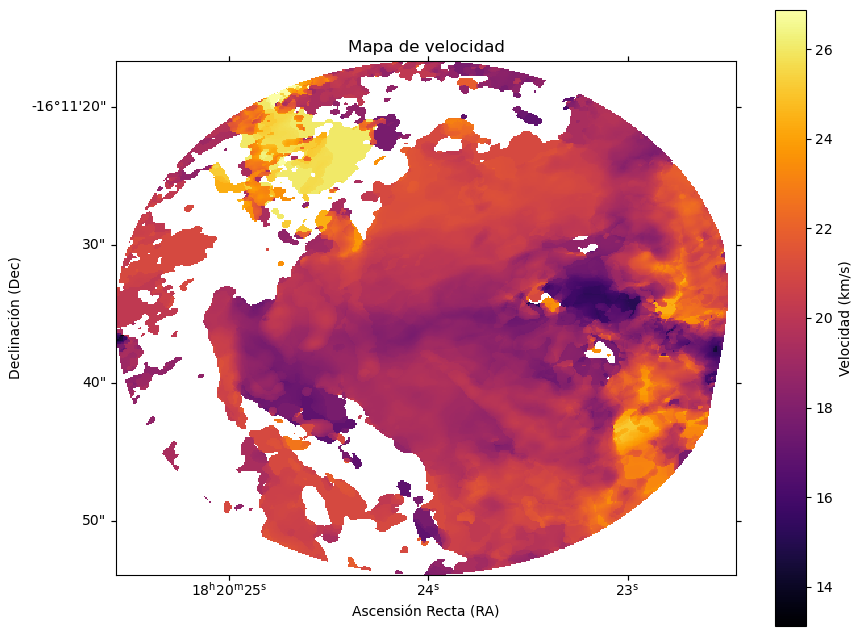

AttributeError: 'FITSPlotter' object has no attribute 'close'

In [7]:
#Flujo integrado

fits_file = "/home/holman/FILES/M17_P2019/ALMA01480118_m0_nomask.fits"
#fits_file = "/home/jennifer/casa/M17_p2015/ALMB00094768_contour.png"
plotter = FITSPlotter(image_fits=fits_file)
plotter.plot()

fits_file = "/home/holman/FILES/M17_P2019/ALMA01480118_m1_3sigma.fits"
plotter = FITSPlotter(image_fits=fits_file)
plotter.plot(title="Mapa de velocidad")

plotter.close()


### ALMA01507452: 13CO

- $\sigma$ promedio: 0.007918
- 3$\sigma$: 0.023755
- No se observa un gradiente de v

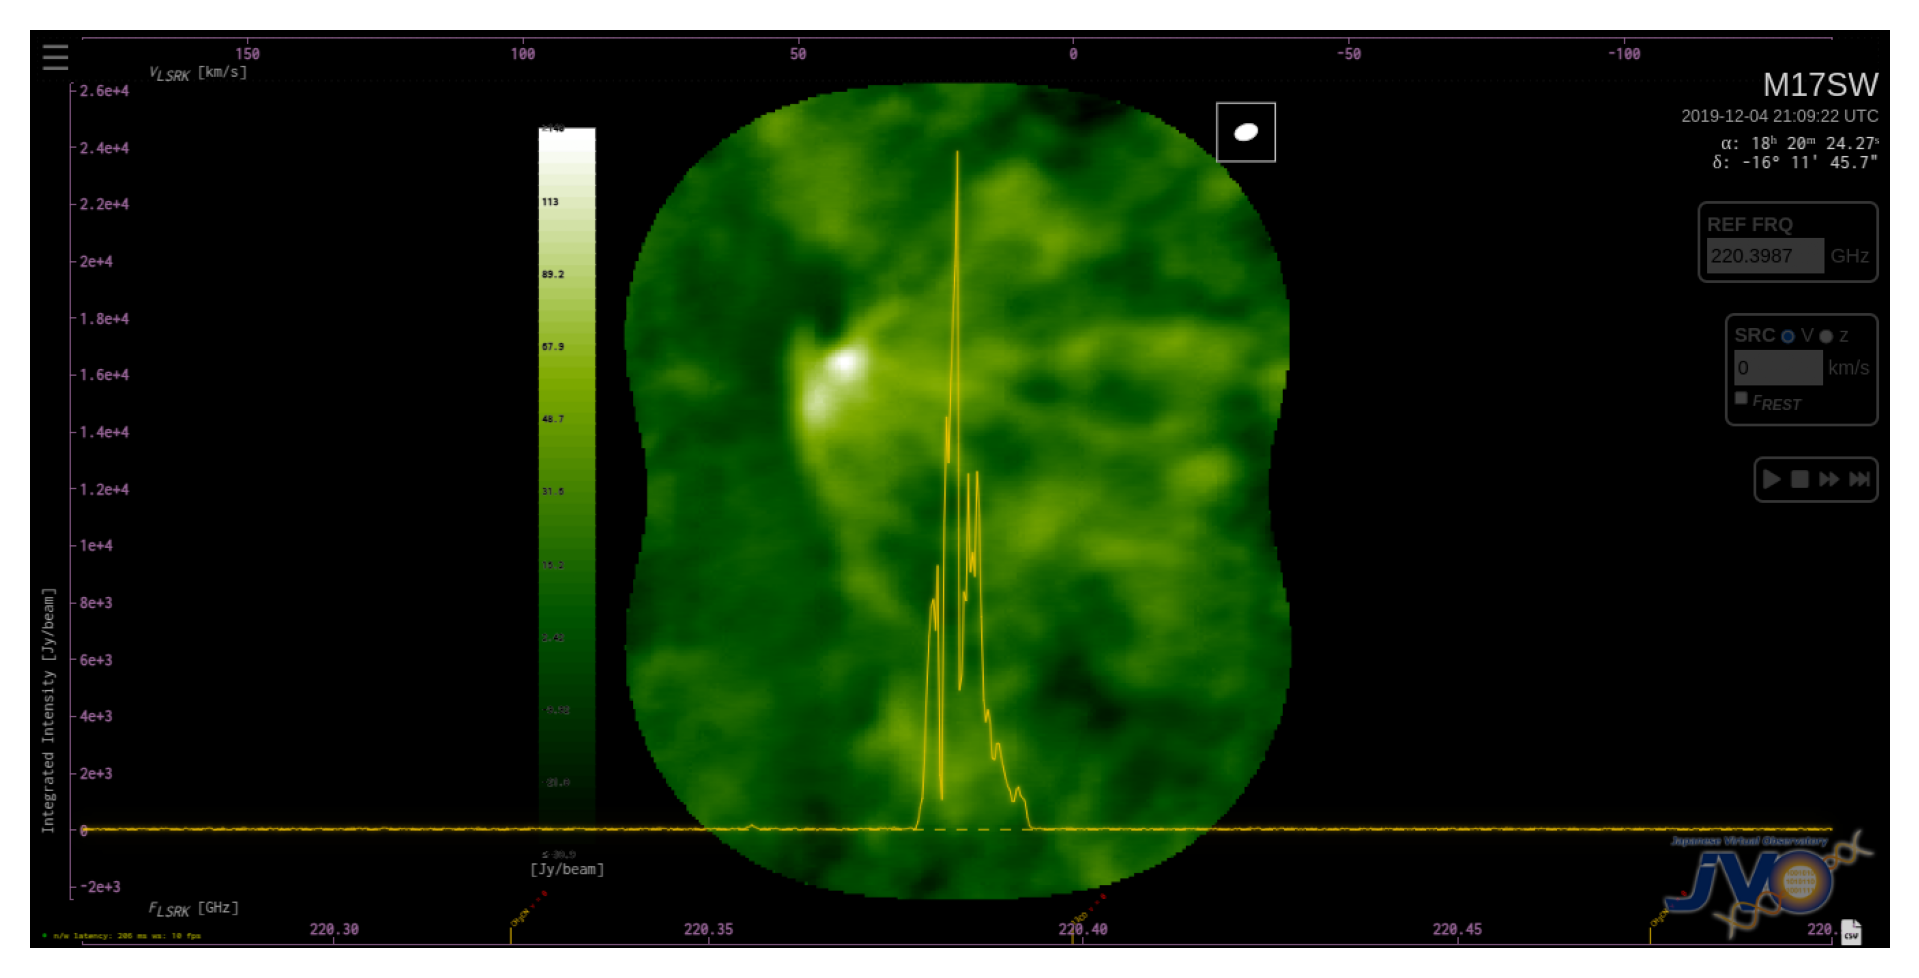

In [12]:
image_path = "images/7452.png"
img = mpimg.imread(image_path)
plt.figure(figsize=(8, 6))  # Ajustar tamaño
plt.imshow(img)
plt.axis("off")  # Ocultar ejes
plt.show()

Primeras filas del archivo:
   220.37367381019655  -7.8963603730e-5
0          220.373796          0.000290
1          220.373918          0.000839
2          220.374040          0.000583
3          220.374162          0.000275
4          220.374284          0.000597
Columnas en el archivo: Index(['220.37367381019655', '-7.8963603730e-5'], dtype='object')
Máxima intensidad: 0.82558 Jy/beam a 220.38320 GHz


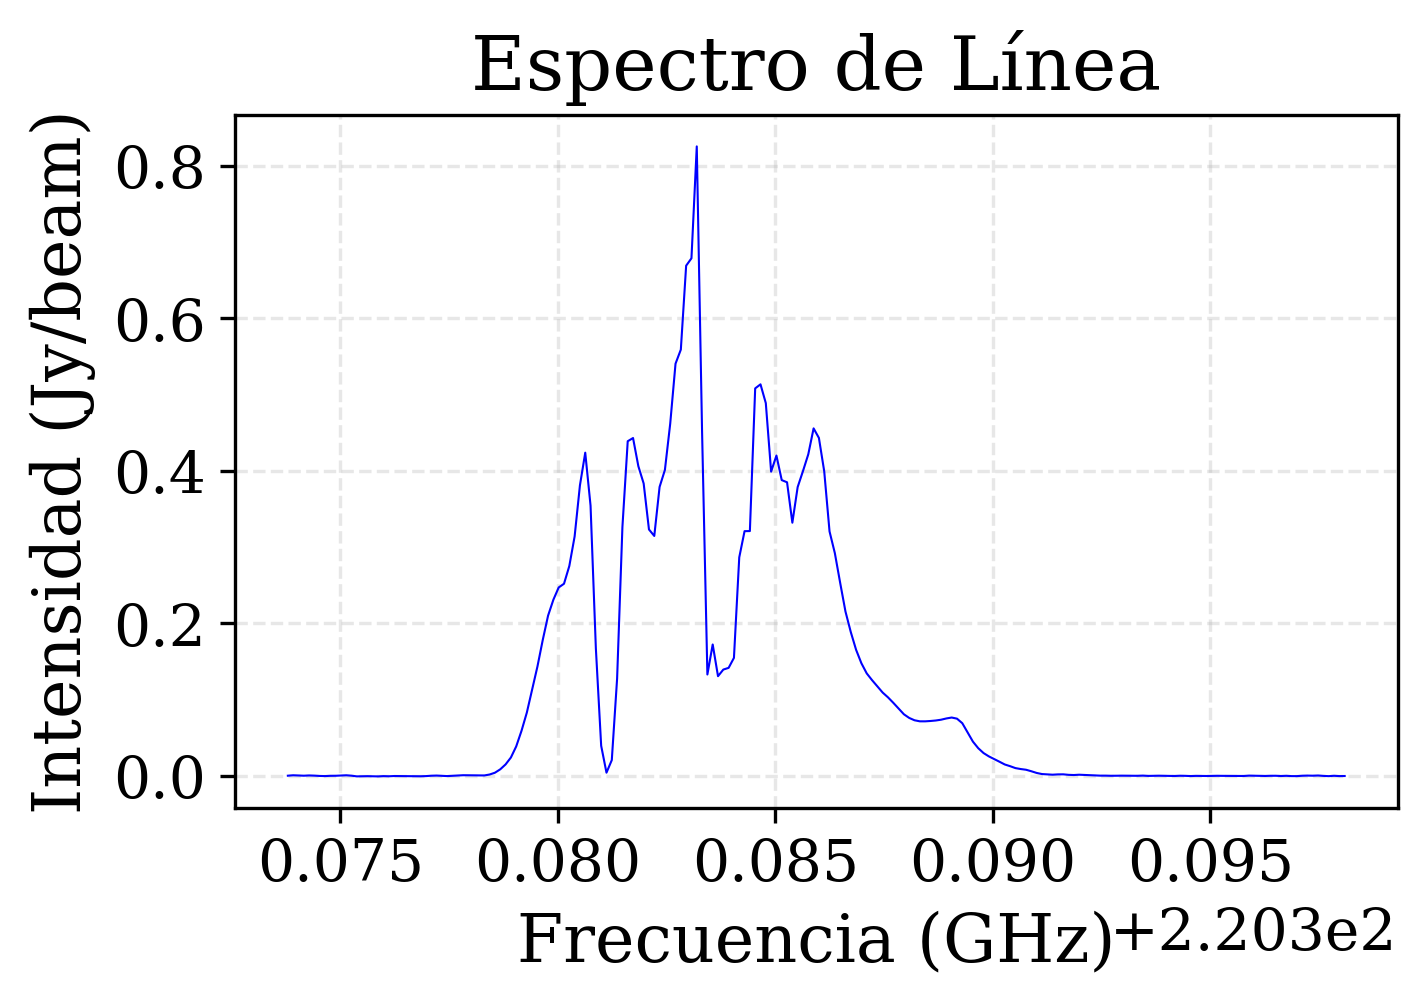

In [8]:
# Ruta del archivo
file_path = "/home/holman/FILES/M17_P2019/ALMA01507452.fits-Z-profile-Region_1-Statistic_Mean-Coordinate_Current-2025-02-17-00-29-08.tsv"

# Cargar el archivo .tsv
spectral_data = pd.read_csv(file_path, sep='\t', comment='#')


# Mostrar las primeras filas del archivo
print("Primeras filas del archivo:")
print(spectral_data.head())

# Verificar las columnas disponibles
print("Columnas en el archivo:", spectral_data.columns)

# Suponiendo que las columnas sean ['Frecuencia', 'Intensidad']
frecuencia = spectral_data.iloc[:, 0]  # Primera columna
intensidad = spectral_data.iloc[:, 1]  # Segunda columna

# Encontrar el valor máximo de intensidad y su frecuencia correspondiente
max_intensidad = intensidad.max()
max_frecuencia = frecuencia[intensidad.idxmax()]
print(f"Máxima intensidad: {max_intensidad:.5f} Jy/beam a {max_frecuencia:.5f} GHz")


# Crear gráfica de frecuencia vs intensidad
plt.figure(figsize=(5, 3))
plt.plot(frecuencia, intensidad, color='blue', linewidth=0.5)
plt.xlabel('Frecuencia (GHz)')
plt.ylabel('Intensidad (Jy/beam)')
plt.title('Espectro de Línea')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


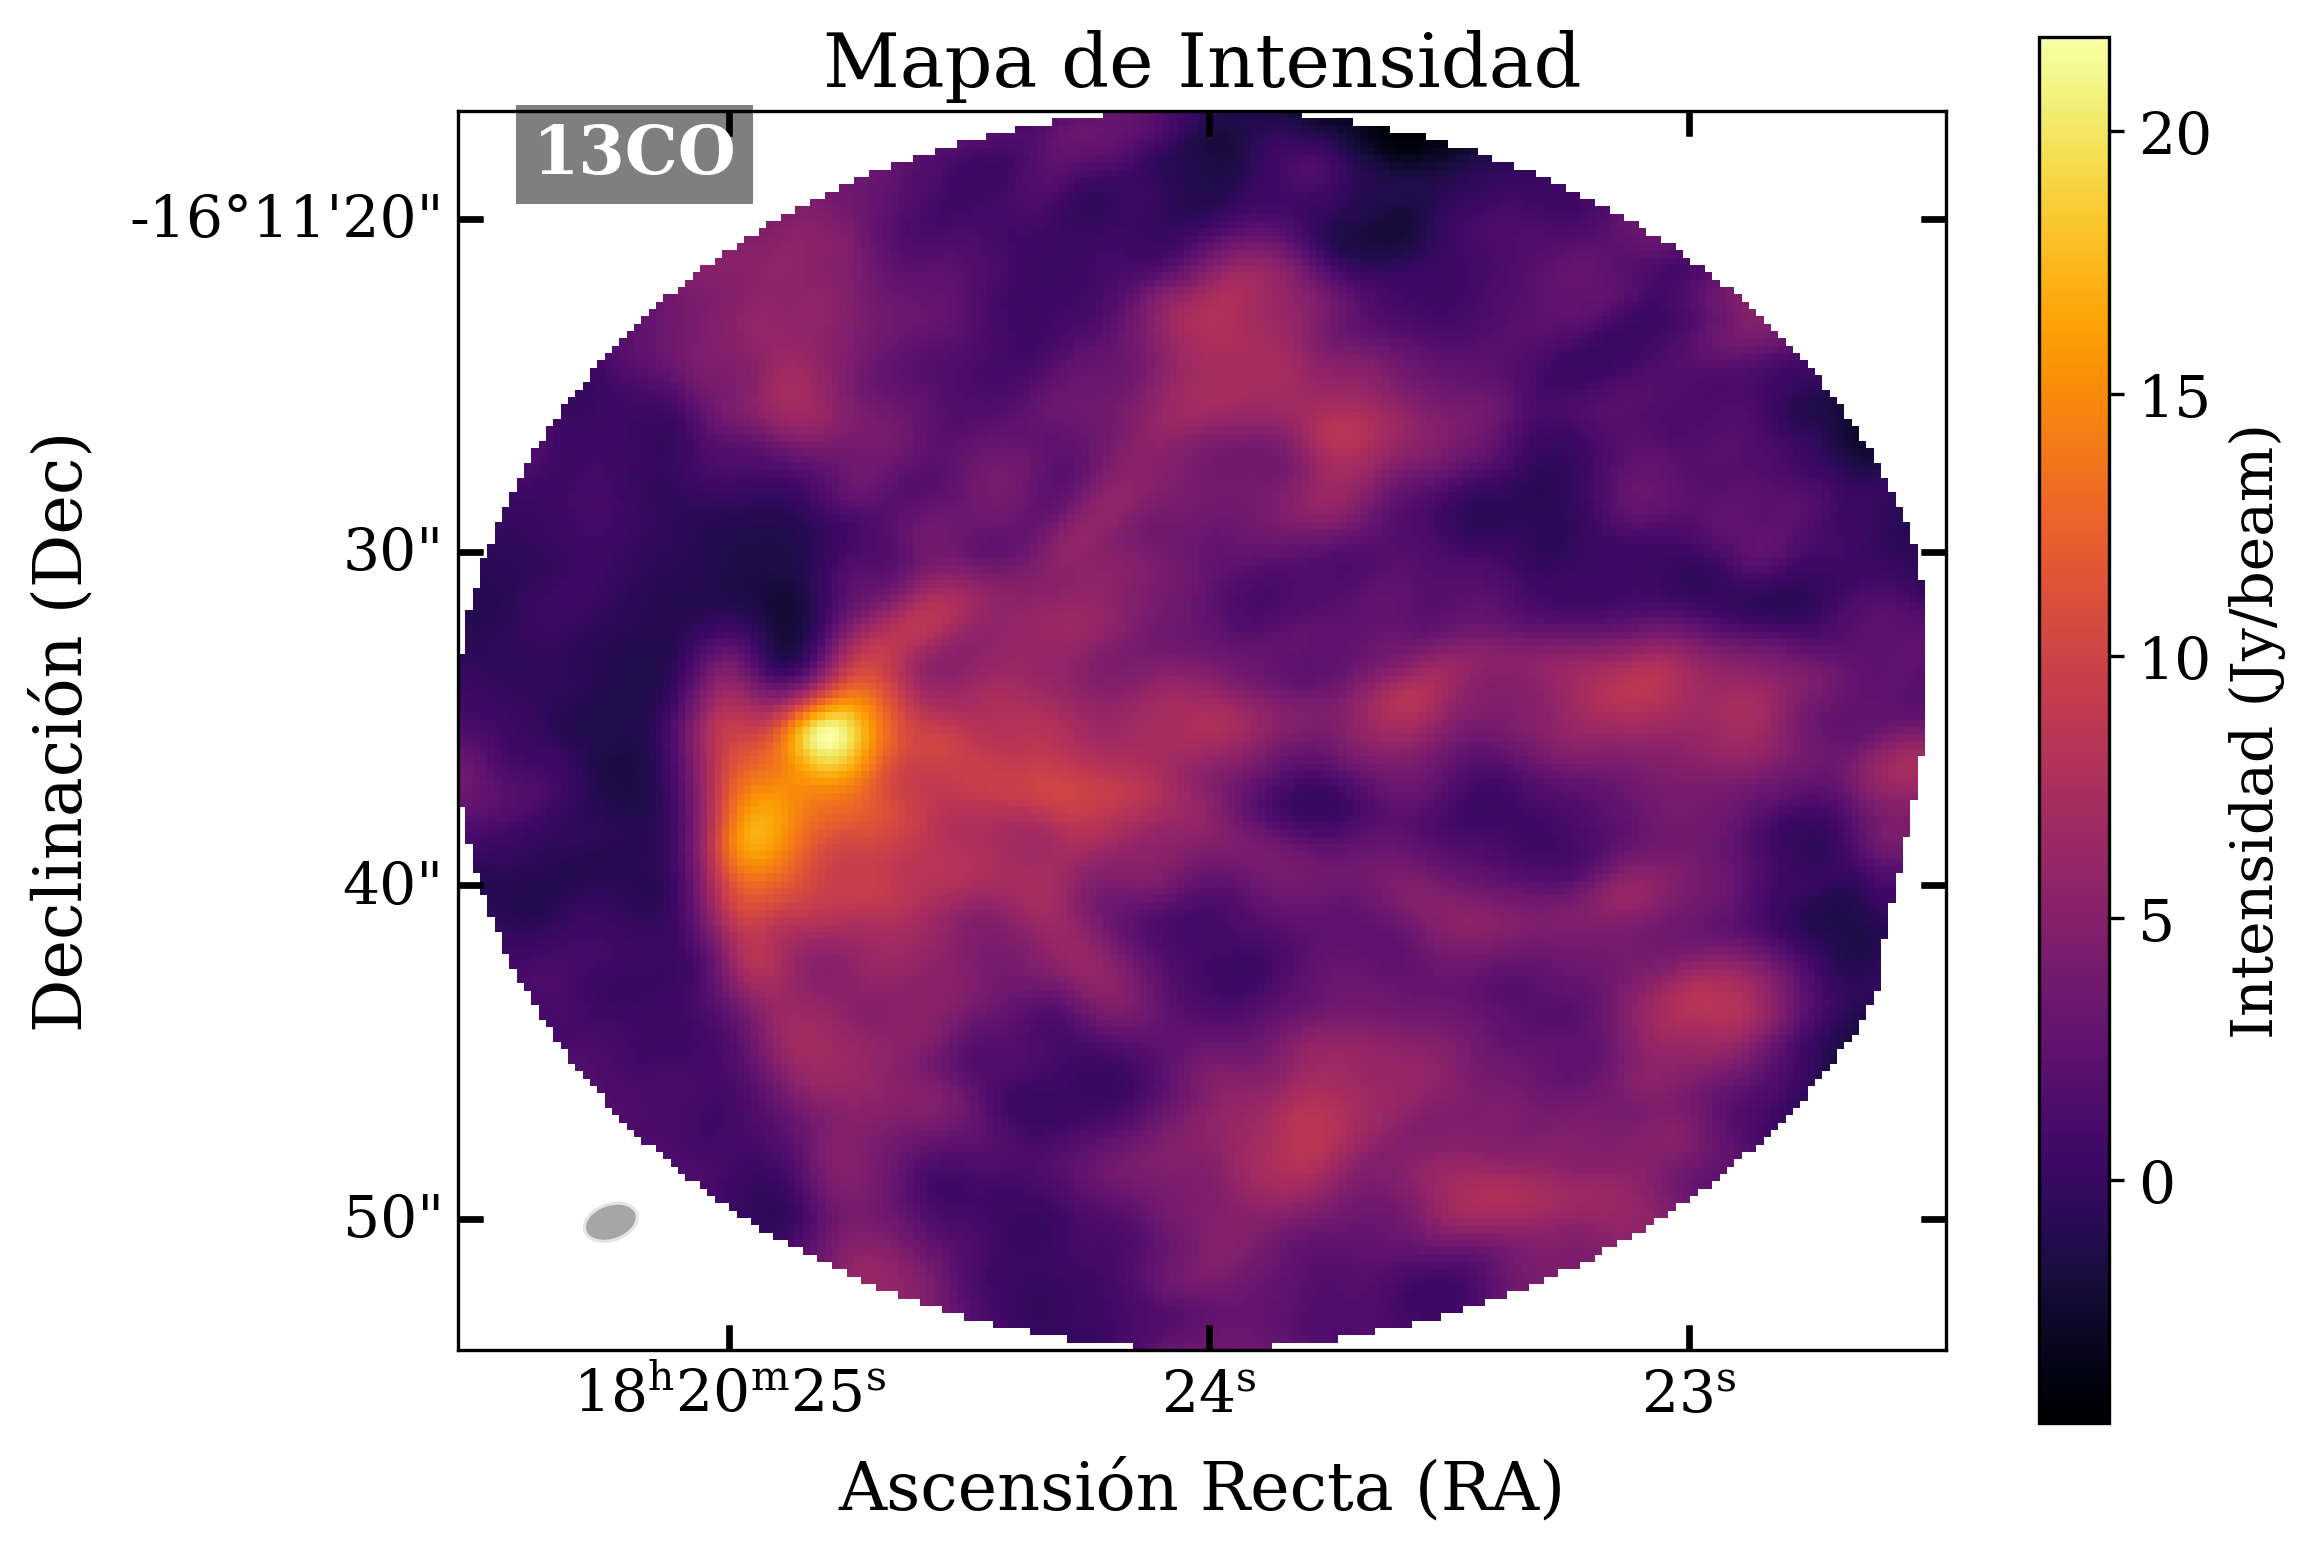

Archivos FITS cerrados.


In [21]:
#Flujo integrado

fits_file = "/home/holman/FILES/M17_P2019/ALMA01507452_m0_nomask.fits"
#fits_file = "/home/jennifer/casa/M17_p2015/ALMB00094768_contour.png"
plotter = FITSPlotter(image_fits=fits_file)
plotter.plot(object_name="13CO")

#fits_file = "/home/holman/FILES/M17_P2019/ALMA01507452_m1_nomask.fits"
#plotter = FITSPlotter(image_fits=fits_file)
#plotter.plot(title="Mapa de velocidad", object_name="M17 SW")

plotter.close()


### ALMA01669401: 
#### CH3OCHO (formato de metilo)
#### 34SO2 (dioxido de azufre)
#### t-CH3CH2OH (etanol)

- $\sigma$ promedio: 0.0049949
- 3$\sigma$: 0.0149847
- CH3OCHO:Se observa un gradiante de $6km/s$ si se usa una mask de 3$\sigma$
- 34SO2:Se observa un gradiante de $3km/s$ si se usa una mask de 3$\sigma$
- t-CH3CH2OH: Se observa un gradiante de $4km/s$ si se usa una mask de 3$\sigma$

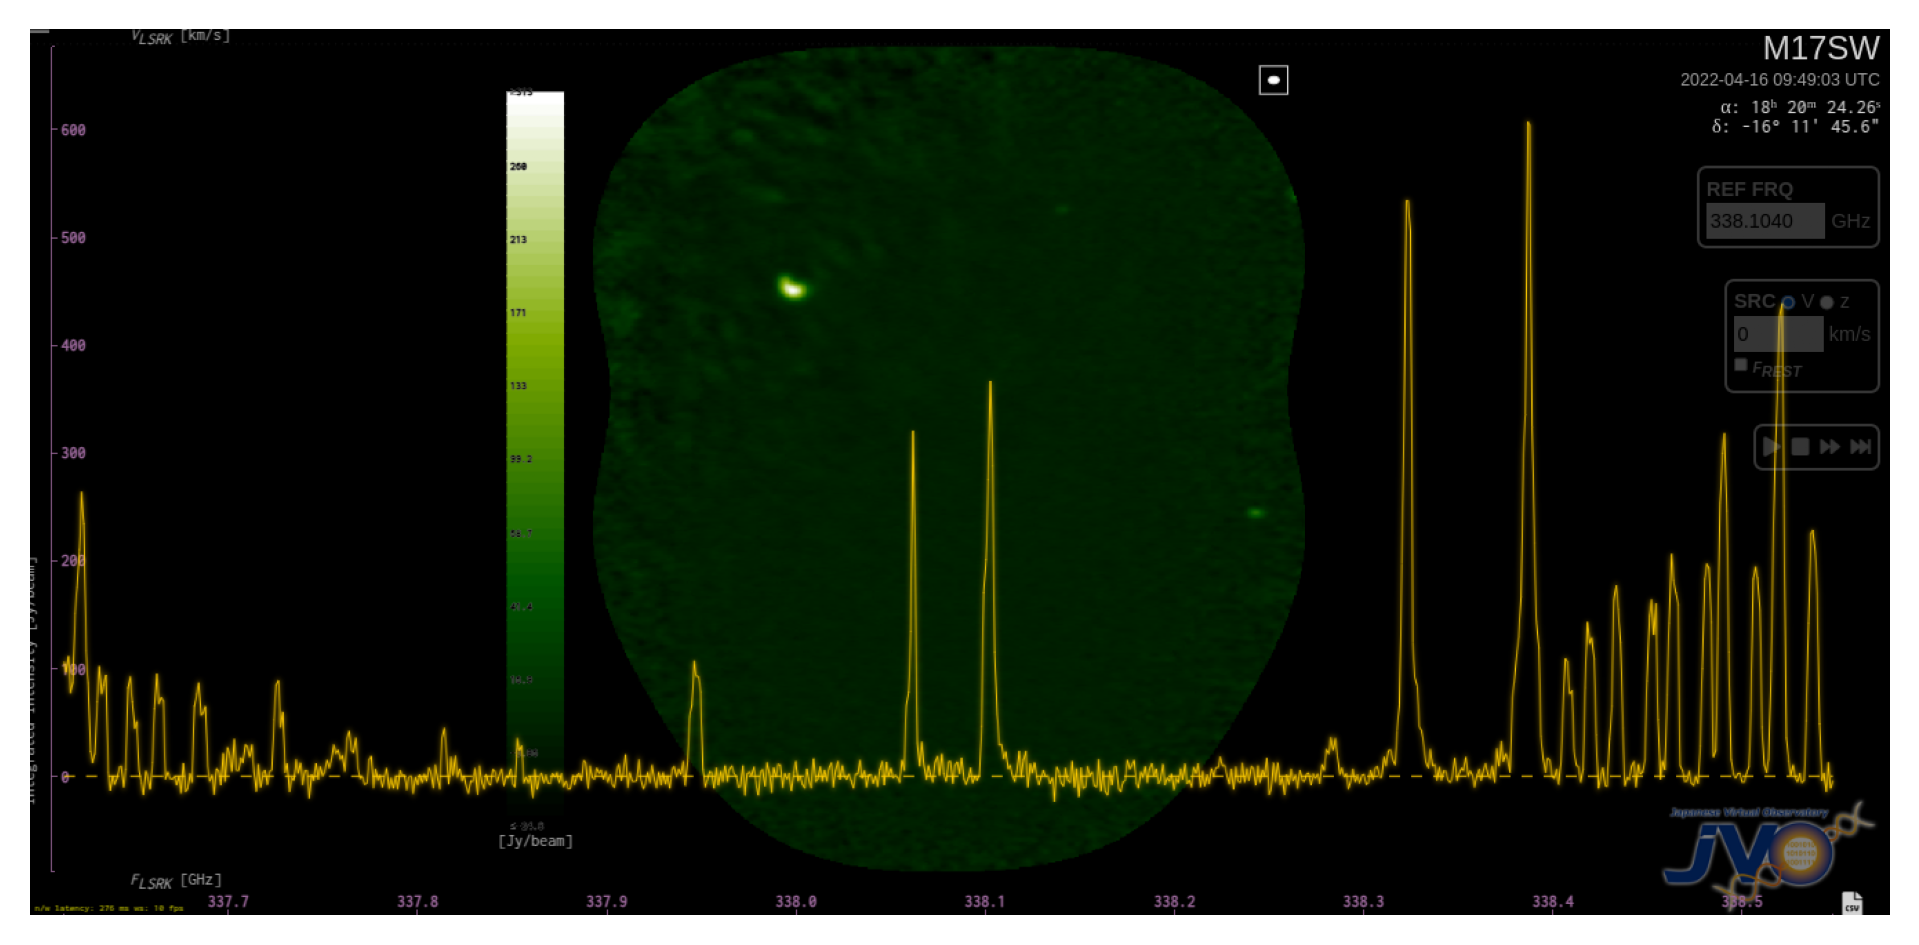

In [18]:
image_path = "images/9401.png"
img = mpimg.imread(image_path)
plt.figure(figsize=(8, 6))  # Ajustar tamaño
plt.imshow(img)
plt.axis("off")  # Ocultar ejes
plt.show()

Primeras filas del archivo:
   337.6133041881  7.0867748385e-4
0      337.613793         0.000684
1      337.614281         0.000612
2      337.614769         0.000607
3      337.615258         0.000606
4      337.615746         0.000517
Columnas en el archivo: Index(['337.6133041881', '7.0867748385e-4'], dtype='object')
Máxima intensidad: 0.00395 Jy/beam a 338.38833 GHz


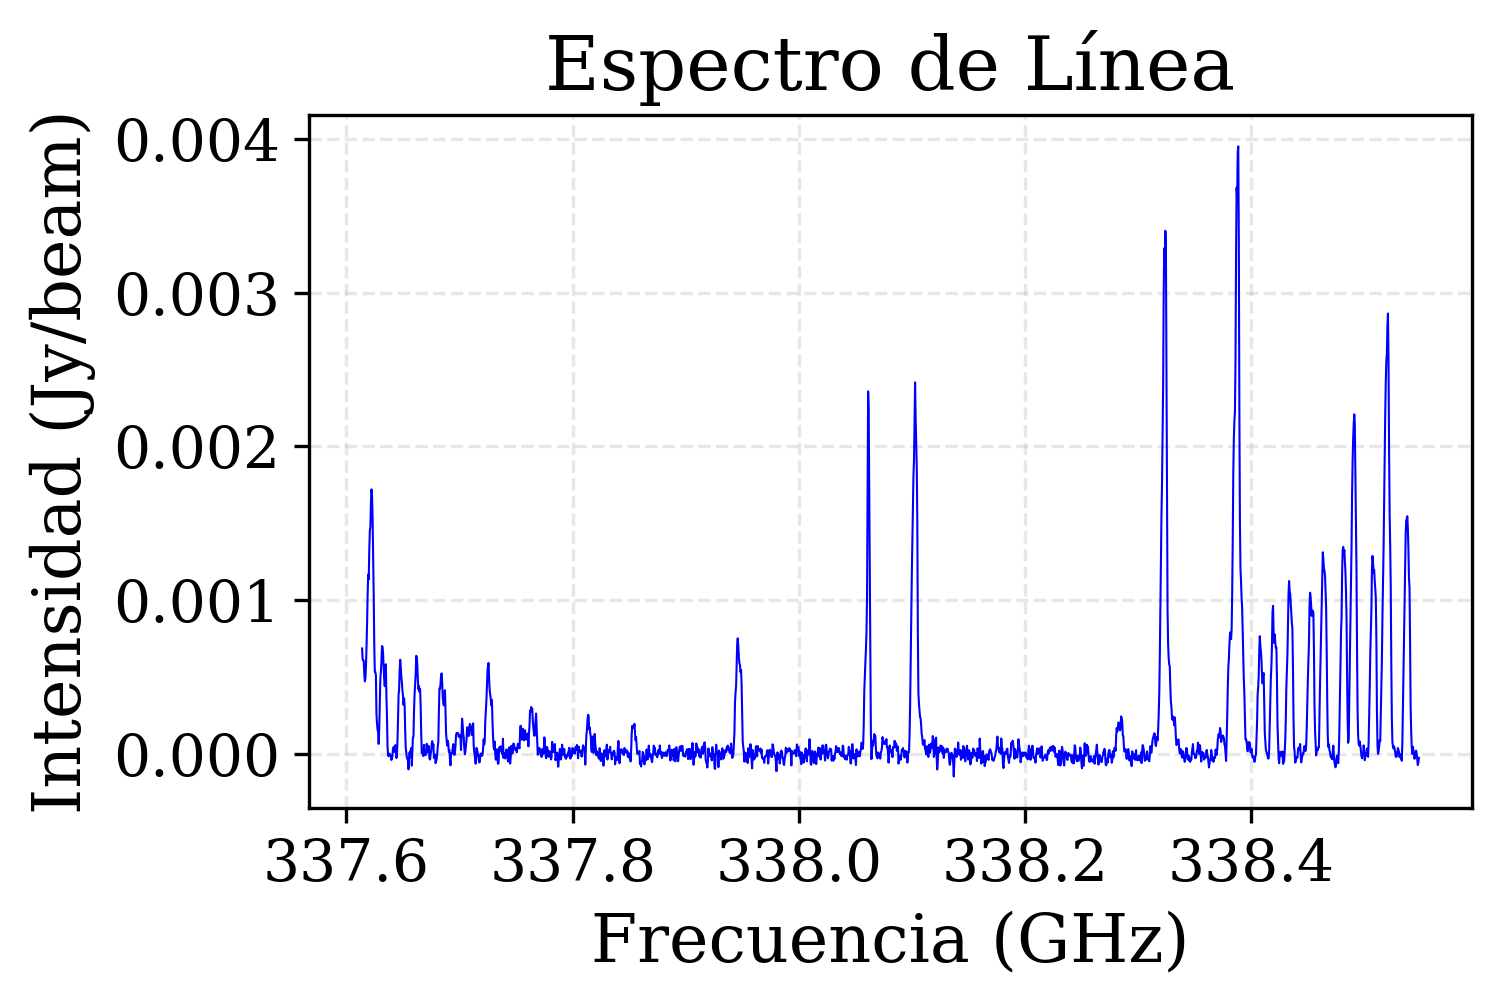

In [9]:
# Ruta del archivo
file_path = "/home/holman/FILES/M17_P2019/ALMA01669401.fits-Z-profile-Region_1-Statistic_Mean-Coordinate_Current-2025-02-17-08-17-09.tsv"

# Cargar el archivo .tsv
spectral_data = pd.read_csv(file_path, sep='\t', comment='#')


# Mostrar las primeras filas del archivo
print("Primeras filas del archivo:")
print(spectral_data.head())

# Verificar las columnas disponibles
print("Columnas en el archivo:", spectral_data.columns)

# Suponiendo que las columnas sean ['Frecuencia', 'Intensidad']
frecuencia = spectral_data.iloc[:, 0]  # Primera columna
intensidad = spectral_data.iloc[:, 1]  # Segunda columna

# Encontrar el valor máximo de intensidad y su frecuencia correspondiente
max_intensidad = intensidad.max()
max_frecuencia = frecuencia[intensidad.idxmax()]
print(f"Máxima intensidad: {max_intensidad:.5f} Jy/beam a {max_frecuencia:.5f} GHz")


# Crear gráfica de frecuencia vs intensidad
plt.figure(figsize=(5, 3))
plt.plot(frecuencia, intensidad, color='blue', linewidth=0.5)
plt.xlabel('Frecuencia (GHz)')
plt.ylabel('Intensidad (Jy/beam)')
plt.title('Espectro de Línea')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


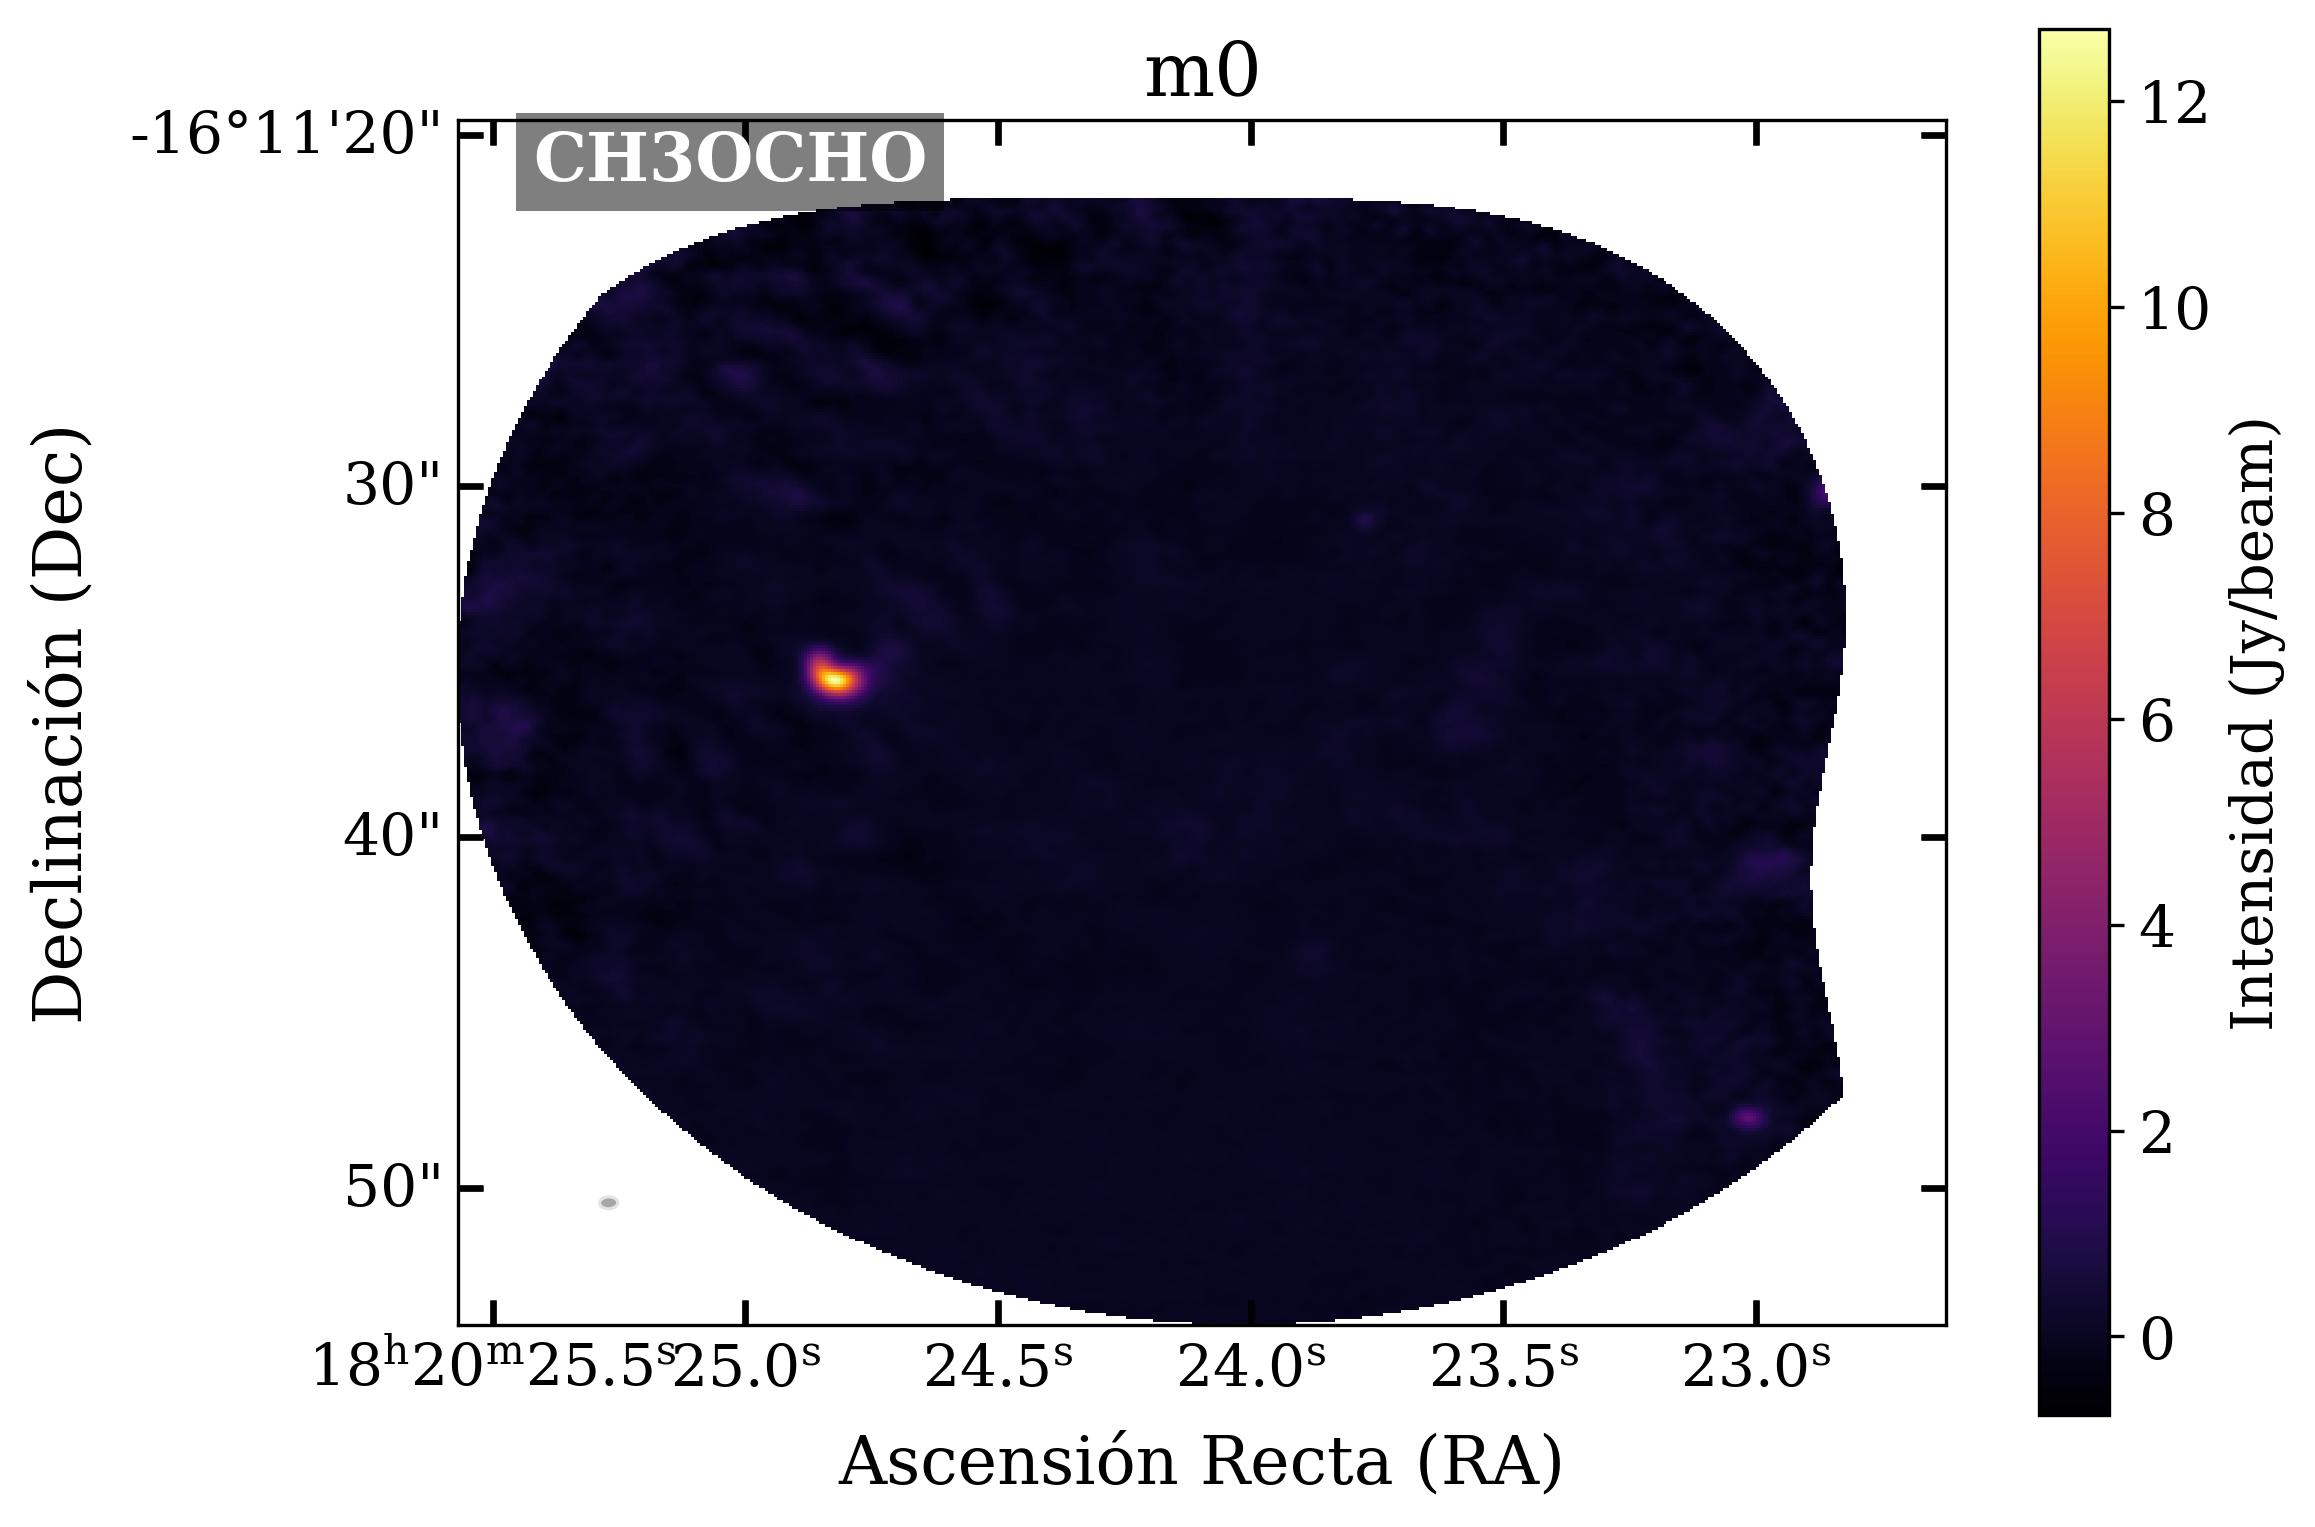

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


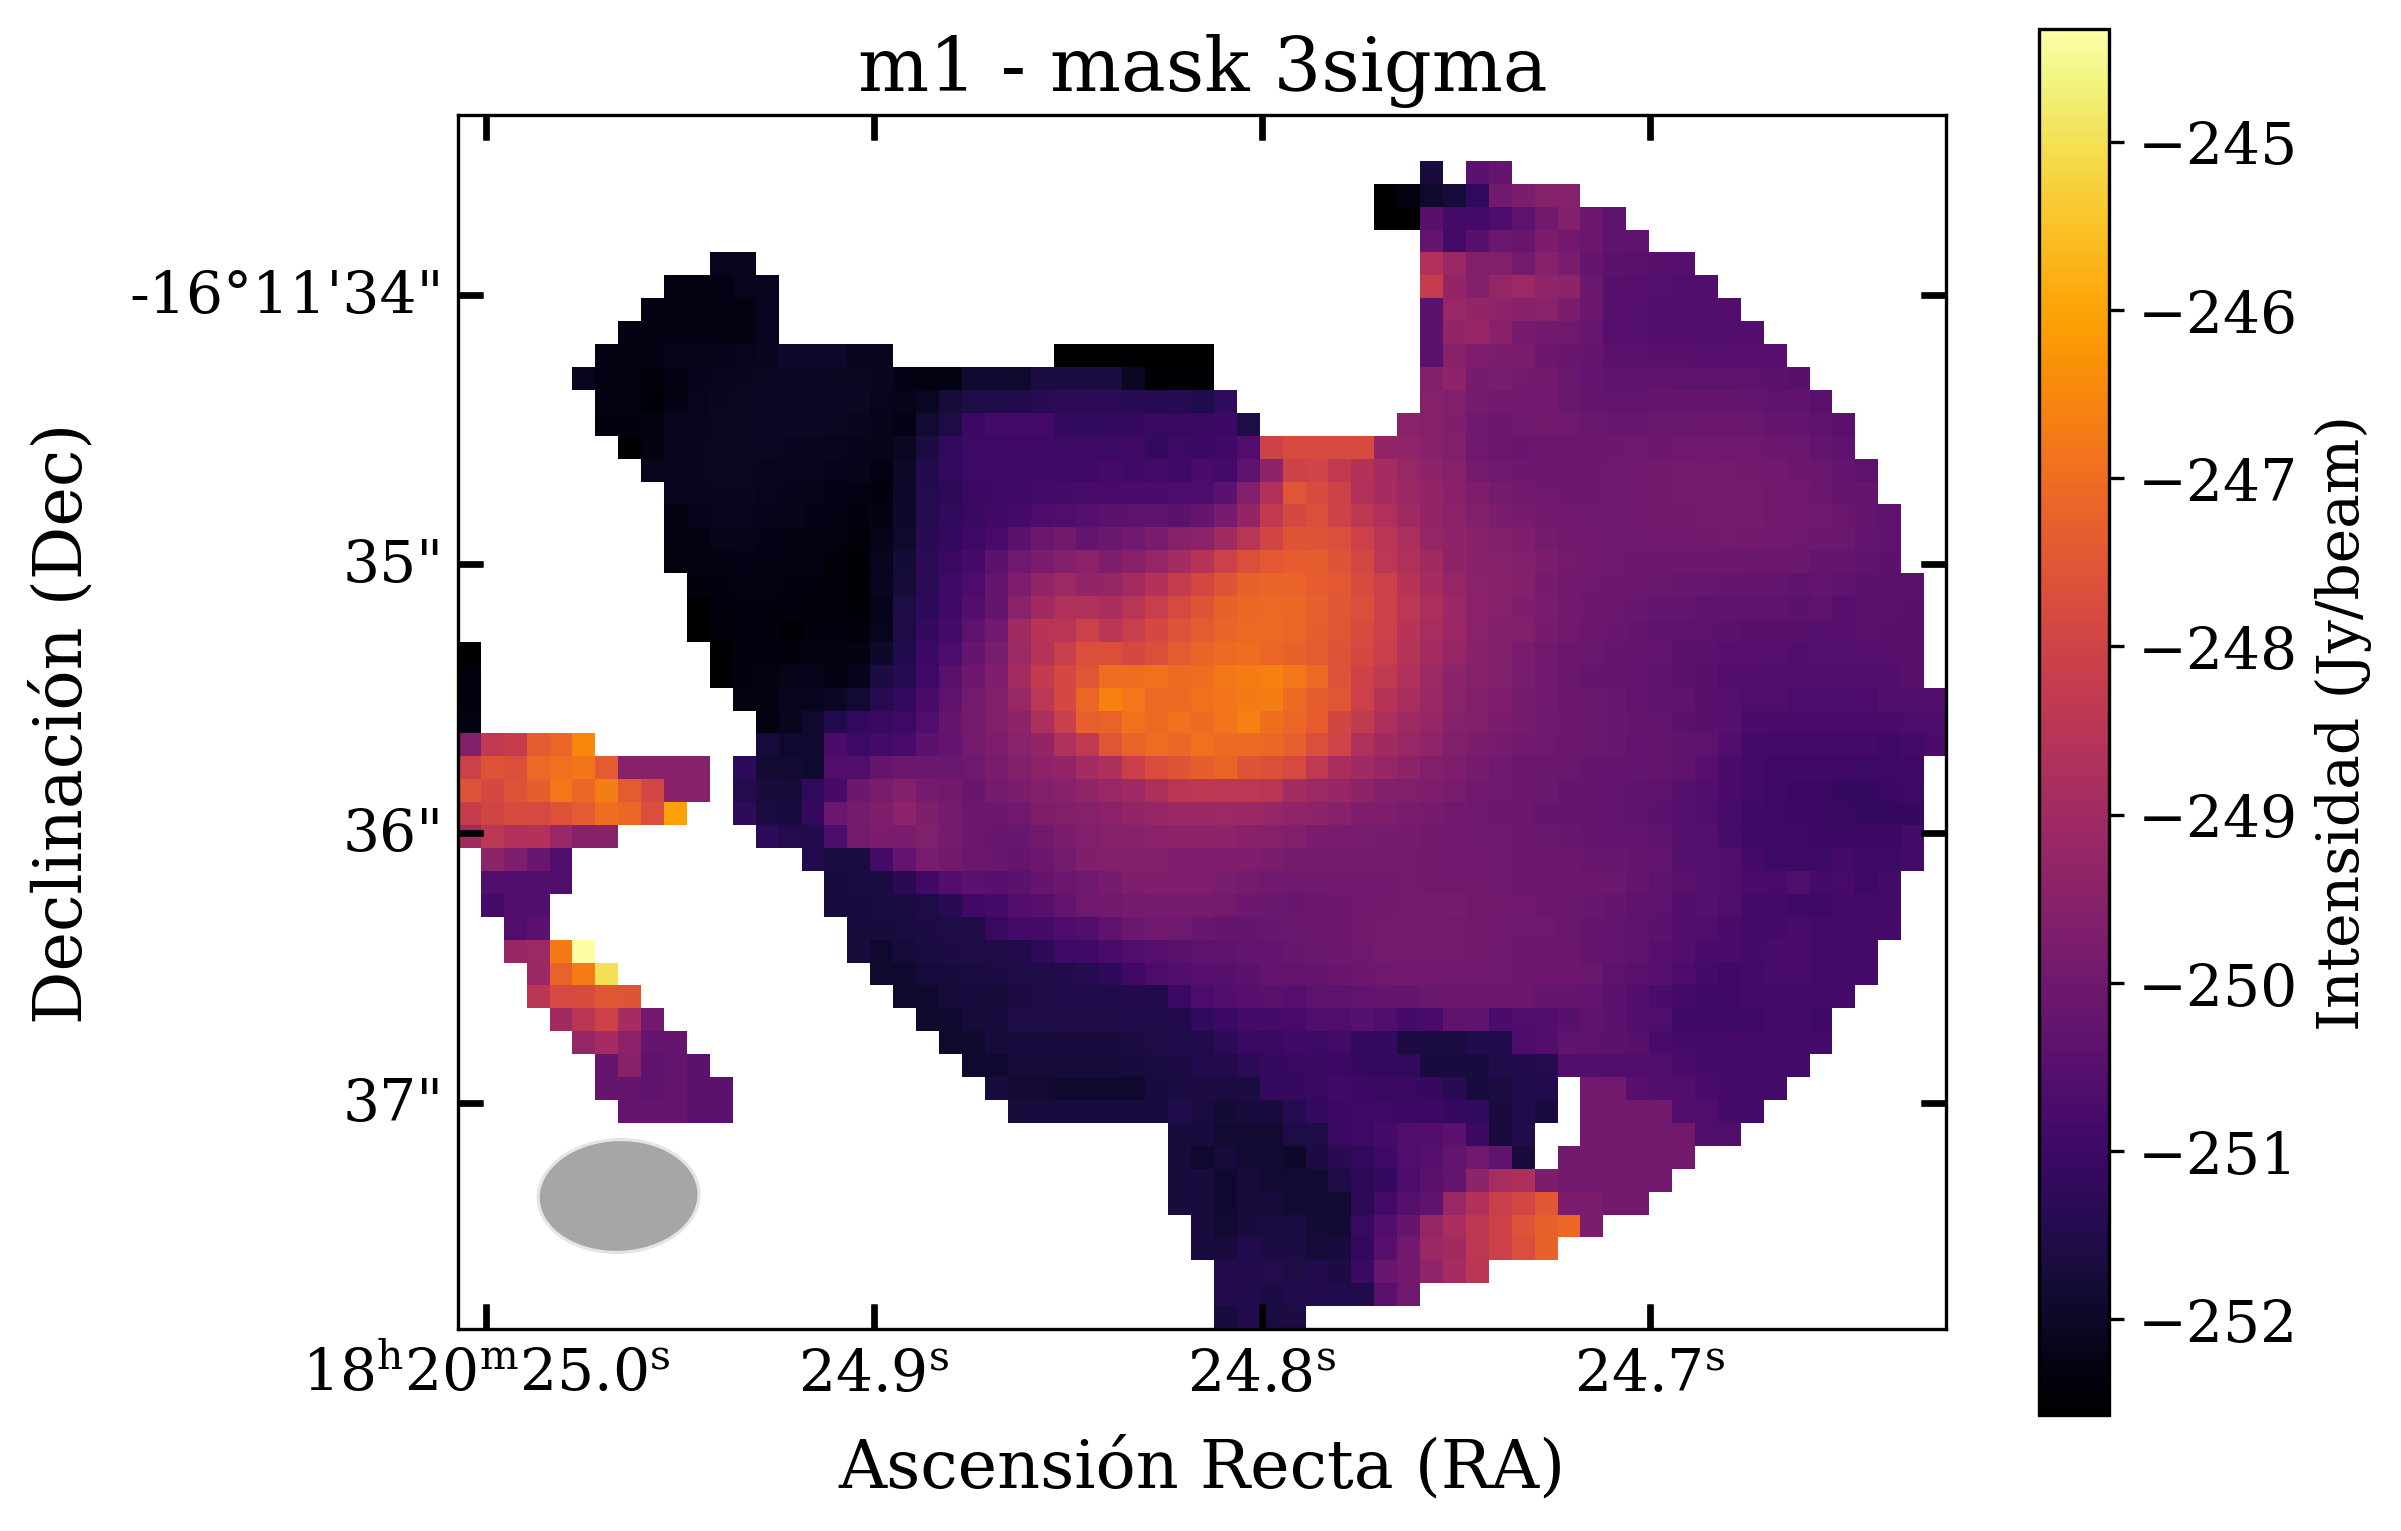

Archivos FITS cerrados.


In [22]:
#ALMA01669401_m0_nomask_CH3OCHO


fits_file = "/home/holman/FILES/M17_P2019/ALMA01669401_m0_nomask_CH3OCHO.fits"
#fits_file = "/home/jennifer/casa/M17_p2015/ALMB00094768_contour.png"
plotter = FITSPlotter(image_fits=fits_file)
plotter.plot(title="m0", object_name="CH3OCHO")

fits_file = "/home/holman/FILES/M17_P2019/ALMA01669401_m1LOC_3sigma_CH3OCHO.fits"
plotter = FITSPlotter(image_fits=fits_file)
plotter.plot(title="m1 - mask 3sigma", object_name="")

plotter.close()


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


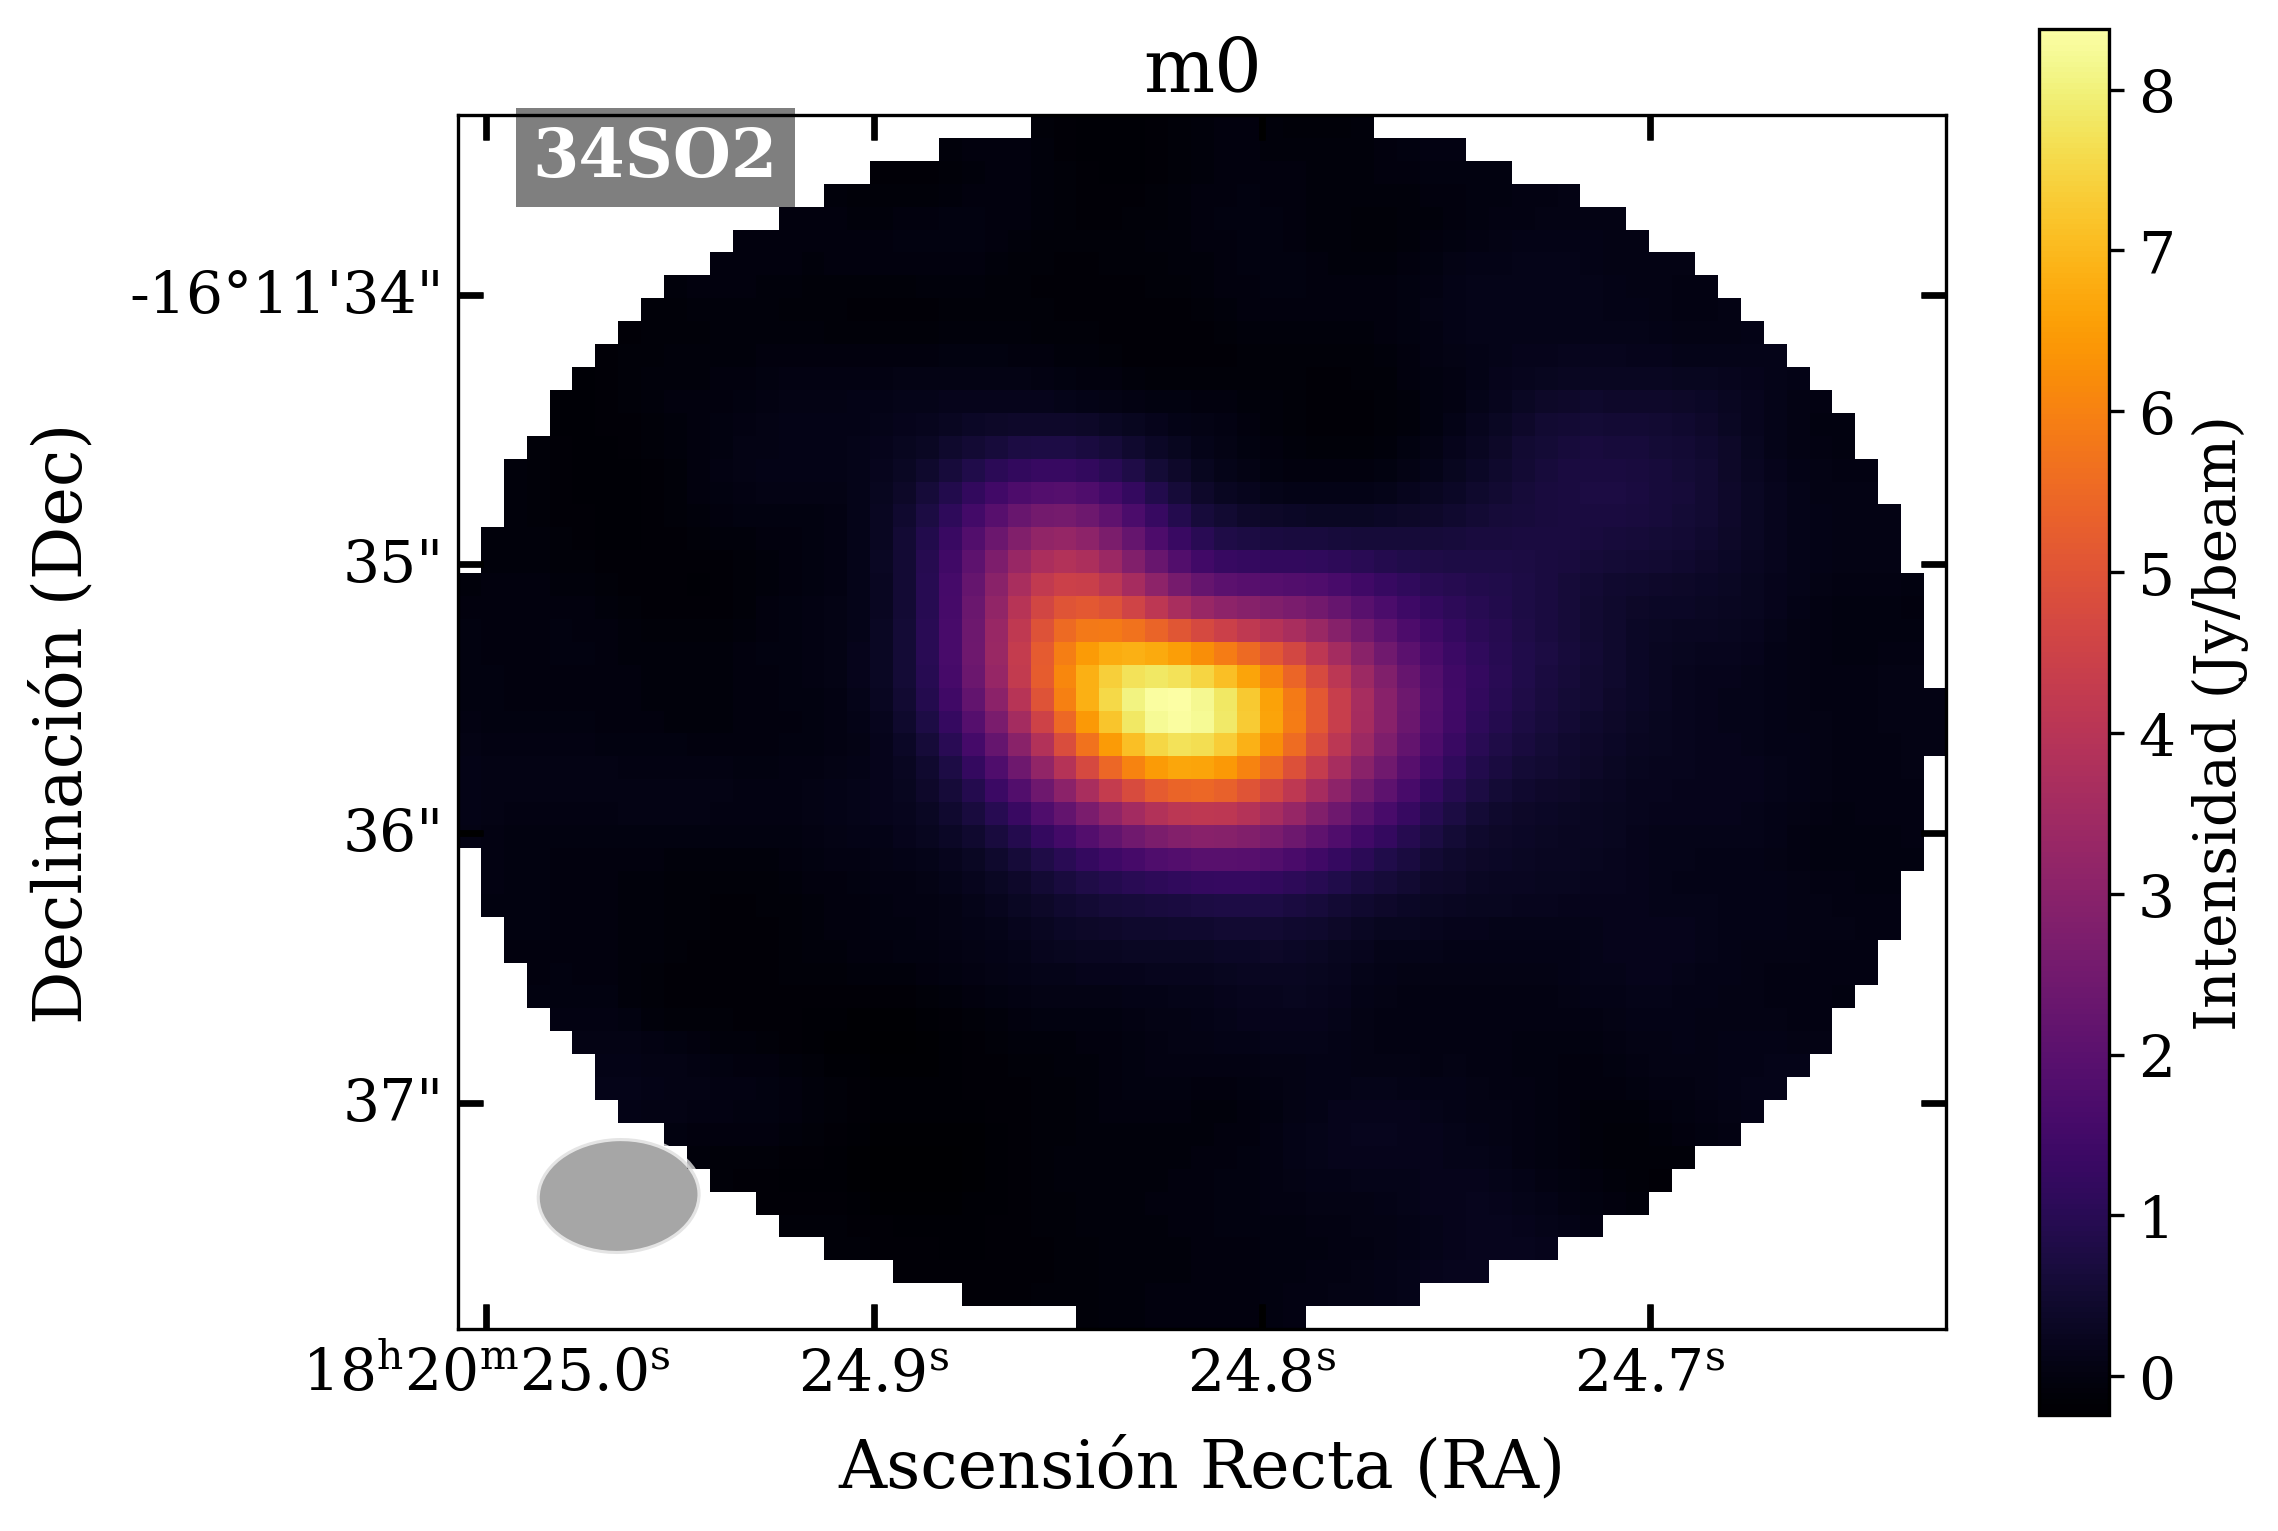

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


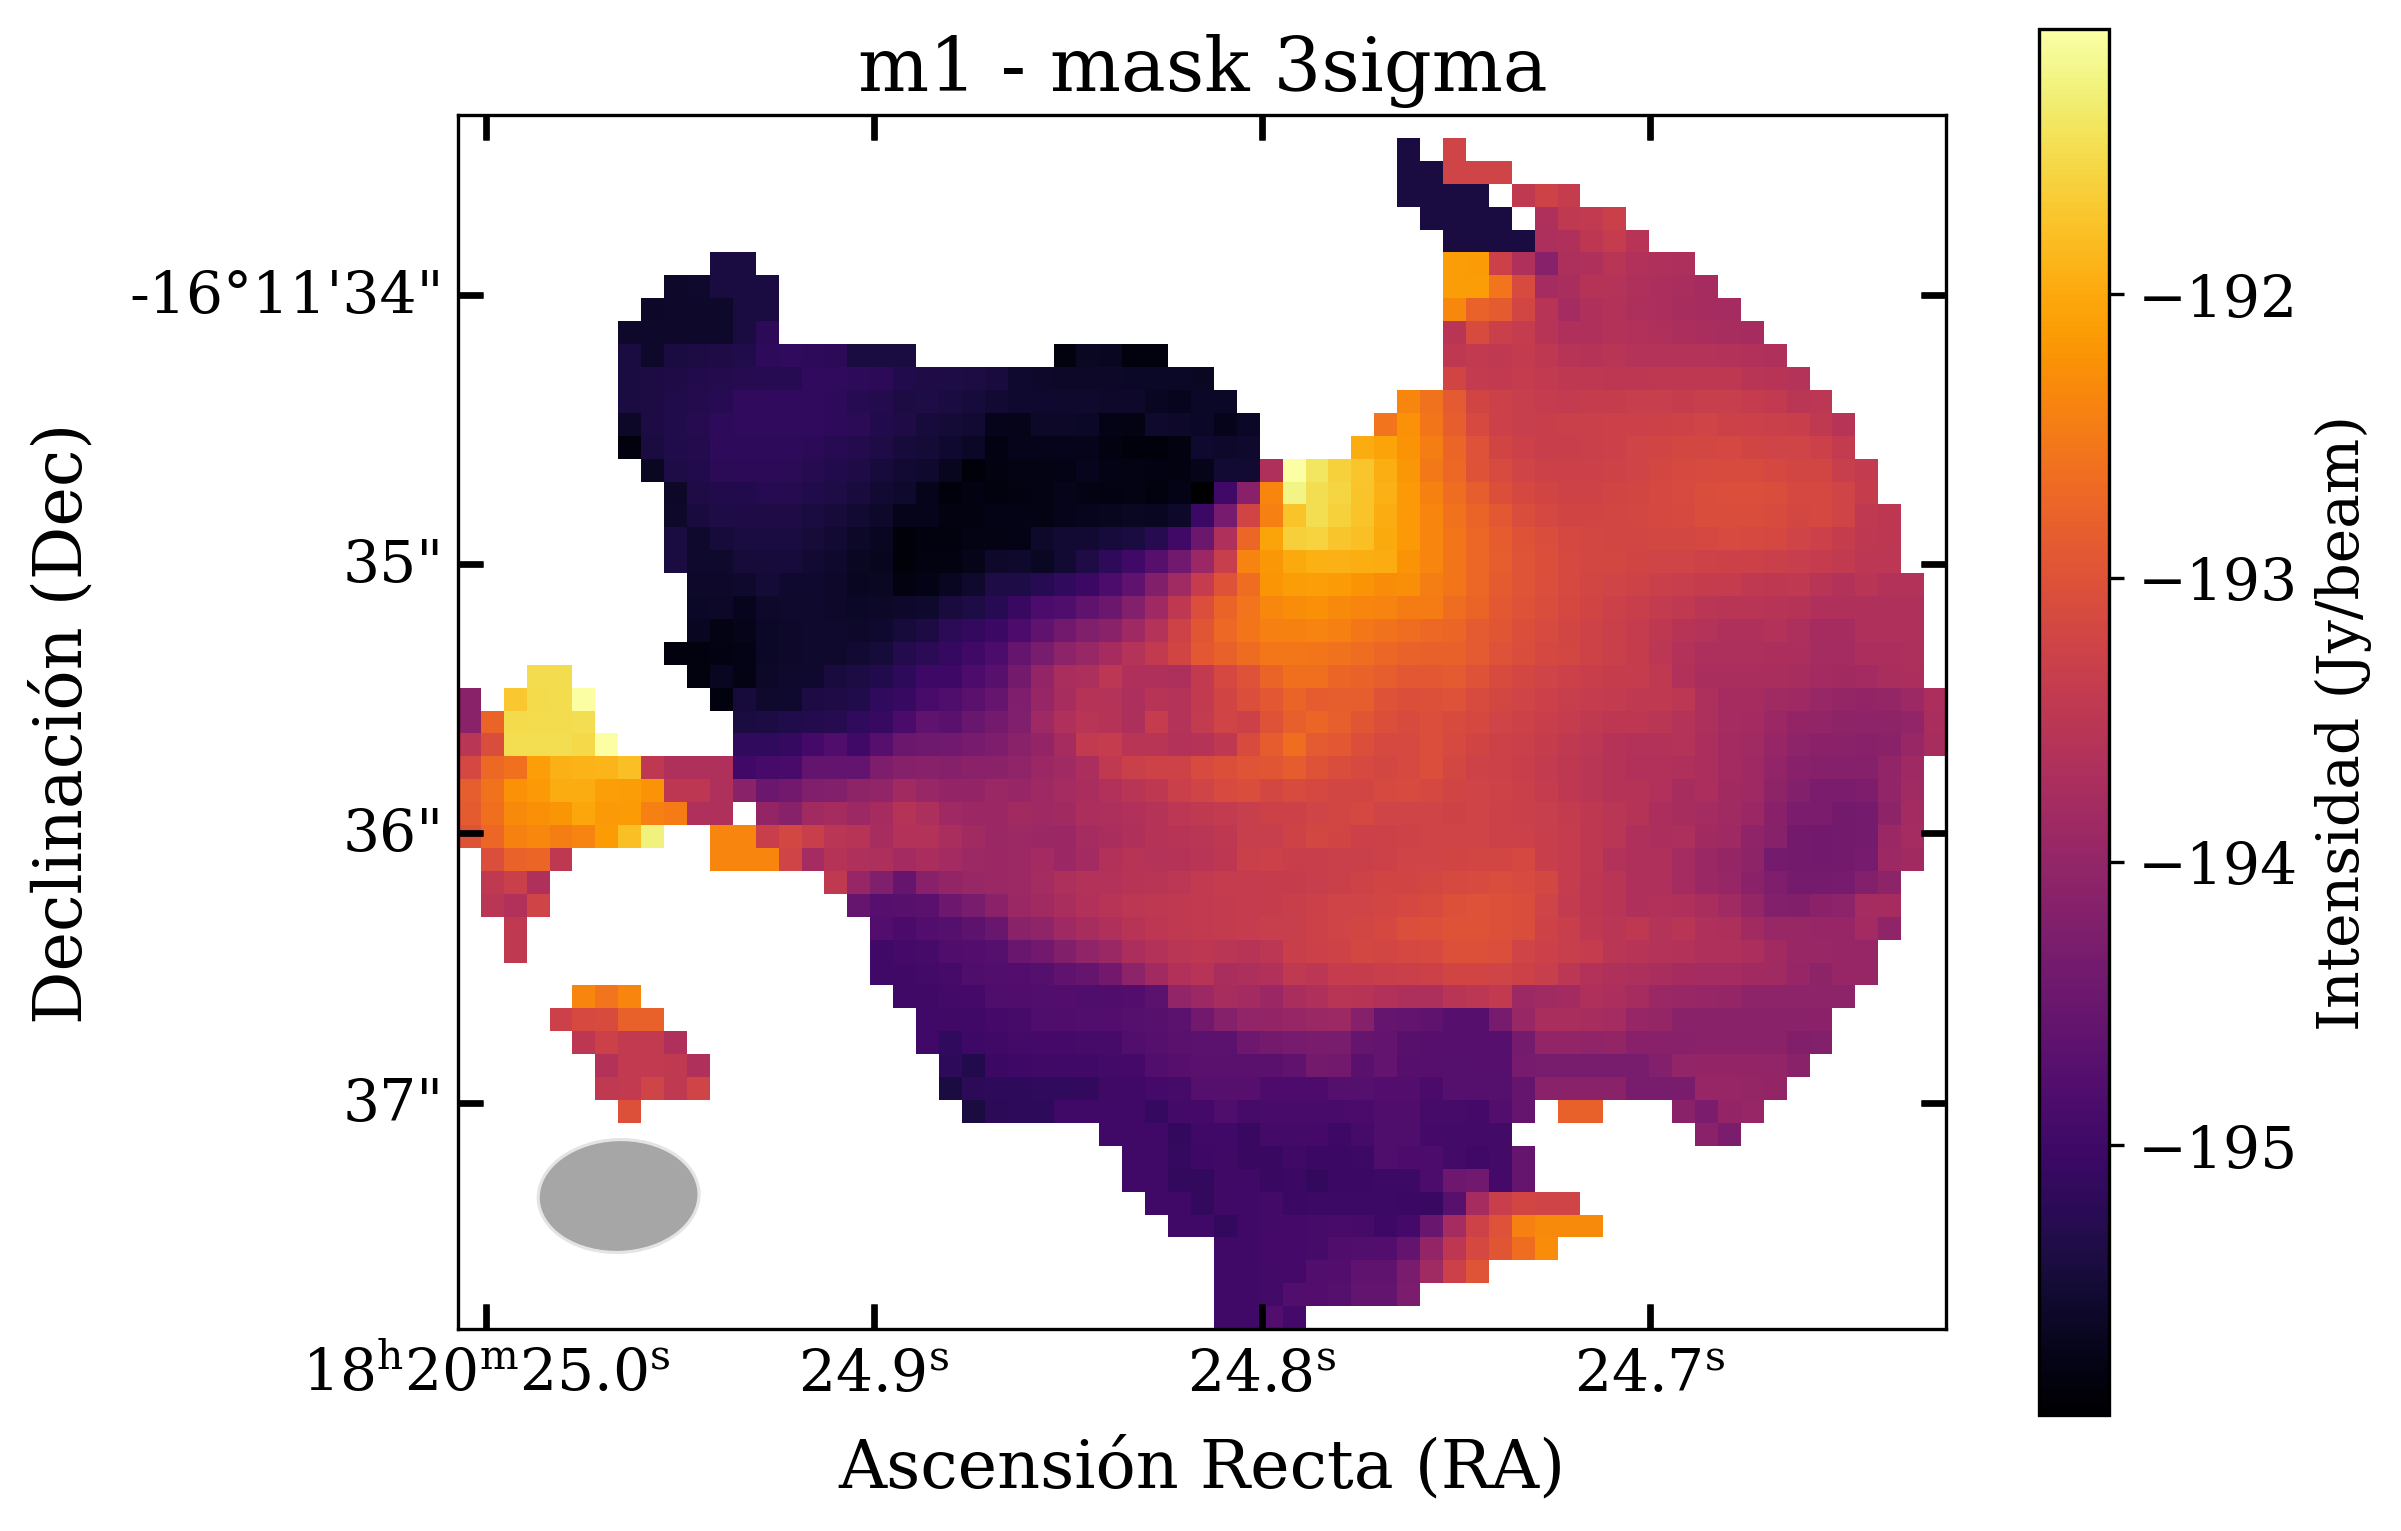

Archivos FITS cerrados.


In [23]:
#34SO2

fits_file = "/home/holman/FILES/M17_P2019/ALMA01669401_m0_nomask_34SO2.fits"
#fits_file = "/home/jennifer/casa/M17_p2015/ALMB00094768_contour.png"
plotter = FITSPlotter(image_fits=fits_file)
plotter.plot(title="m0", object_name="34SO2")

fits_file = "/home/holman/FILES/M17_P2019/ALMA01669401_m1_3sigma_34SO2.fits"
plotter = FITSPlotter(image_fits=fits_file)
plotter.plot(title="m1 - mask 3sigma", object_name="")

plotter.close()

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


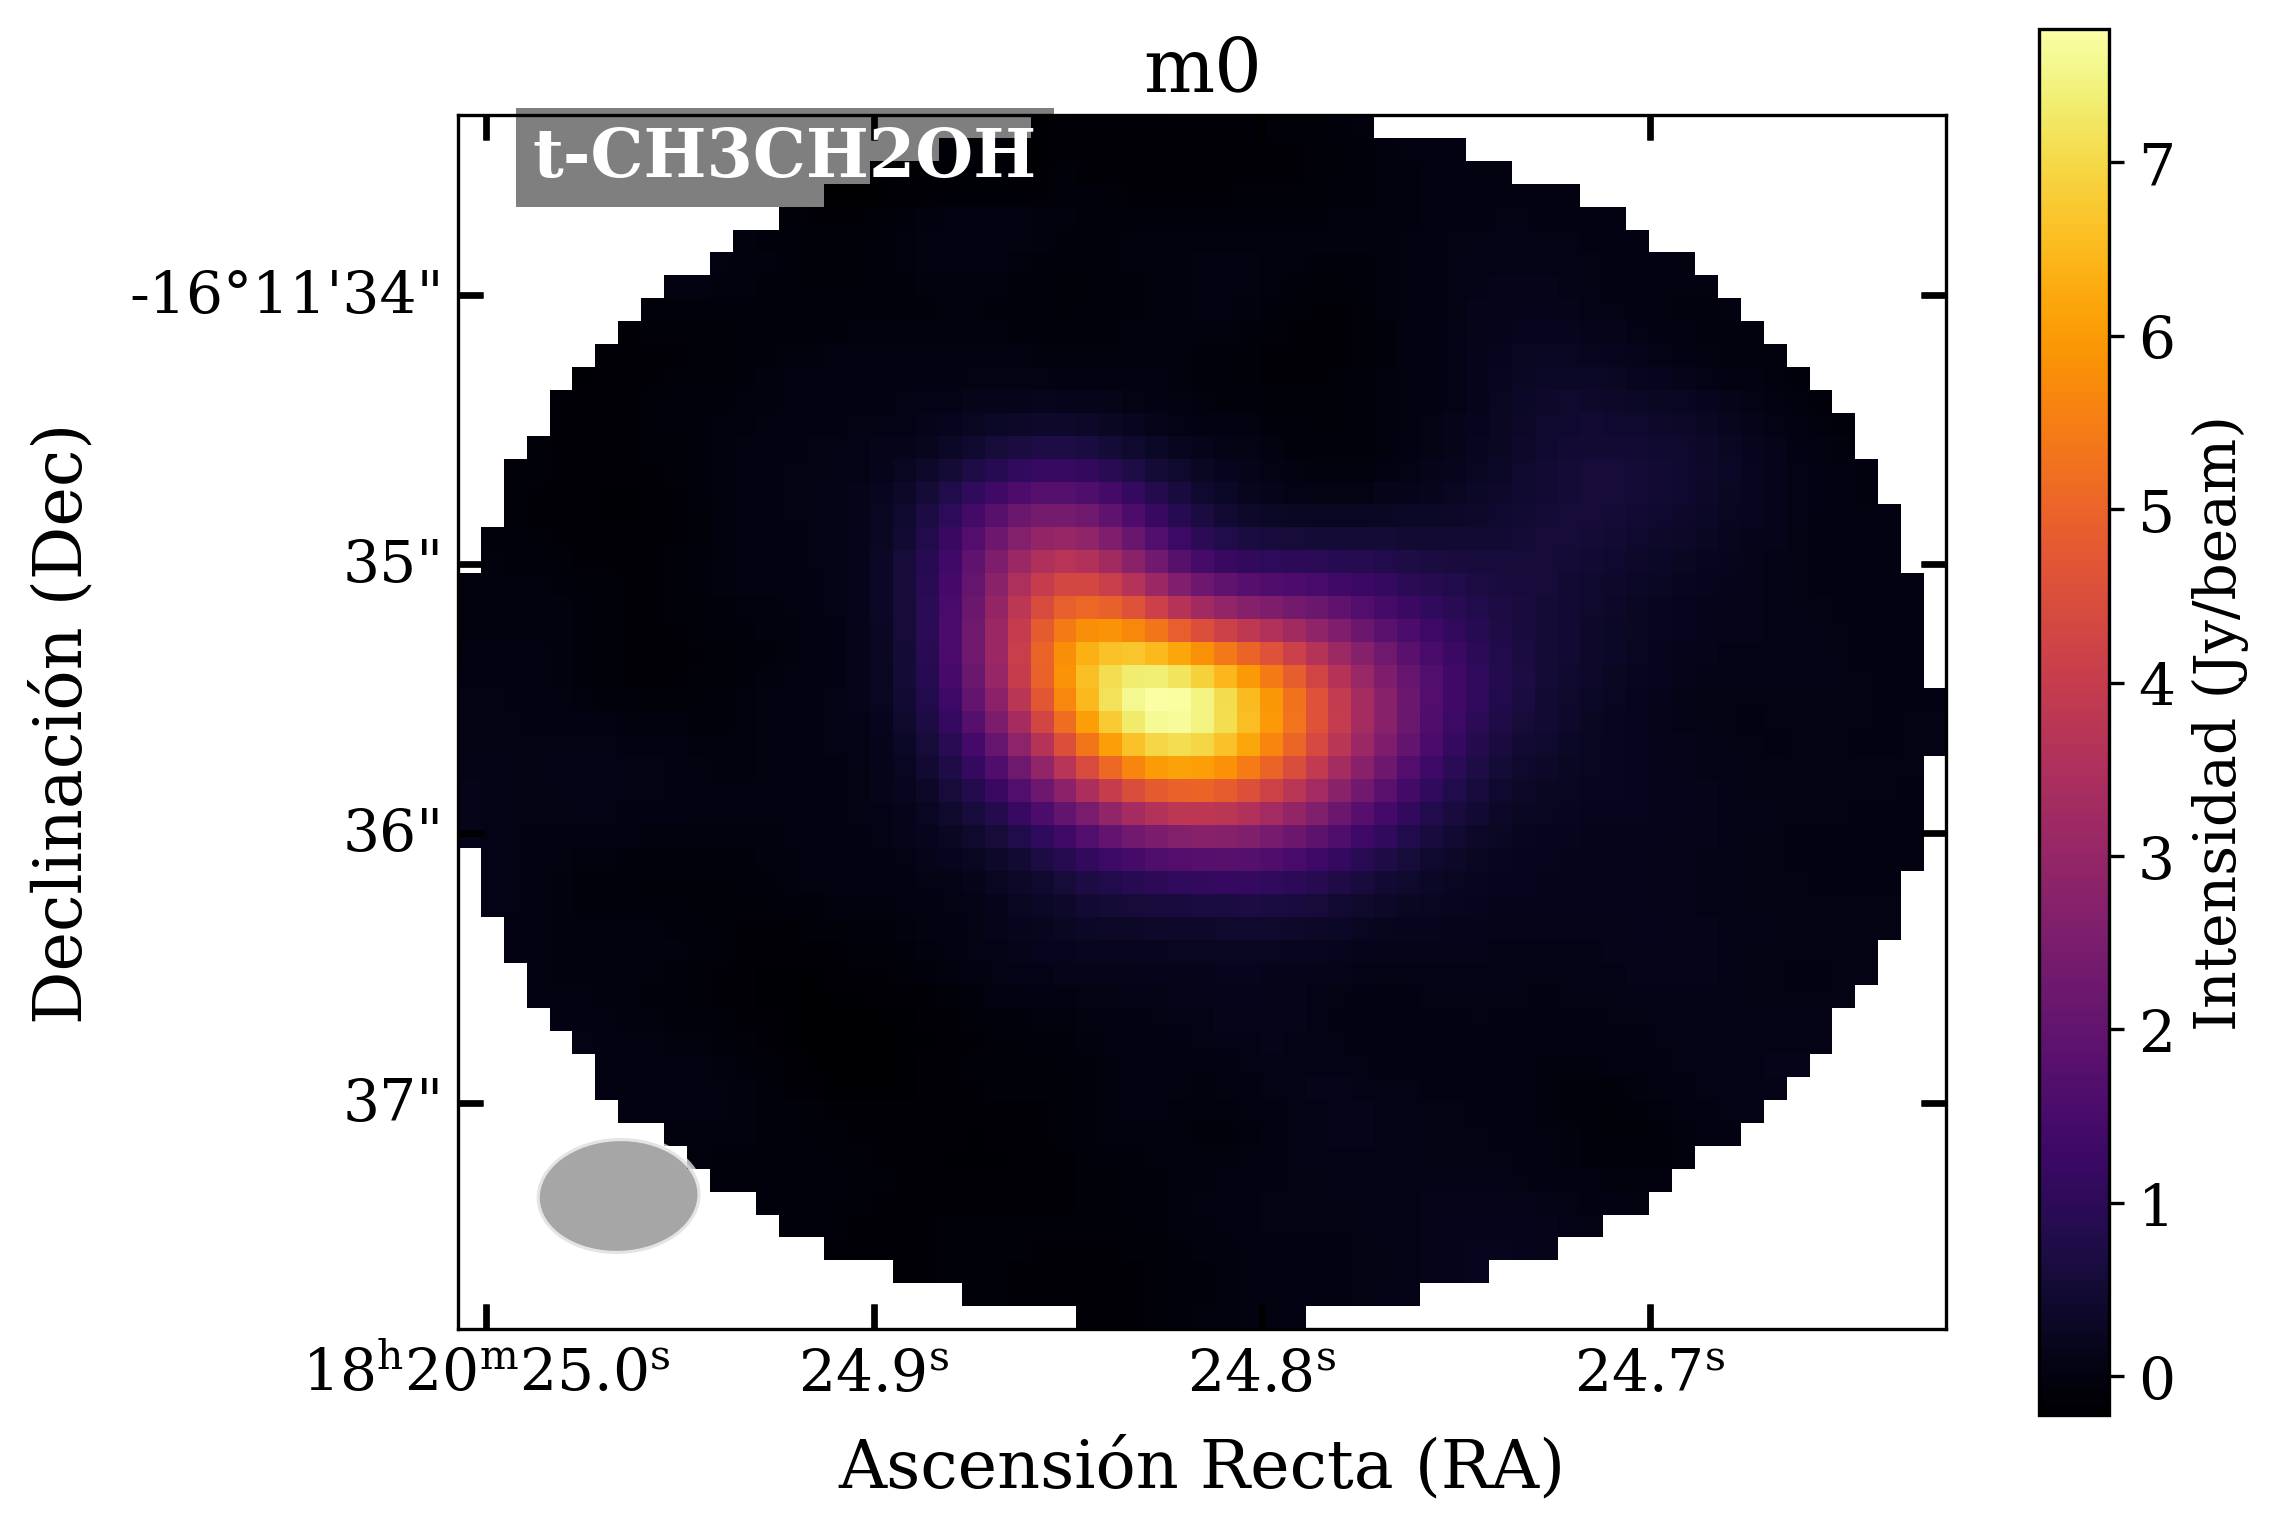

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


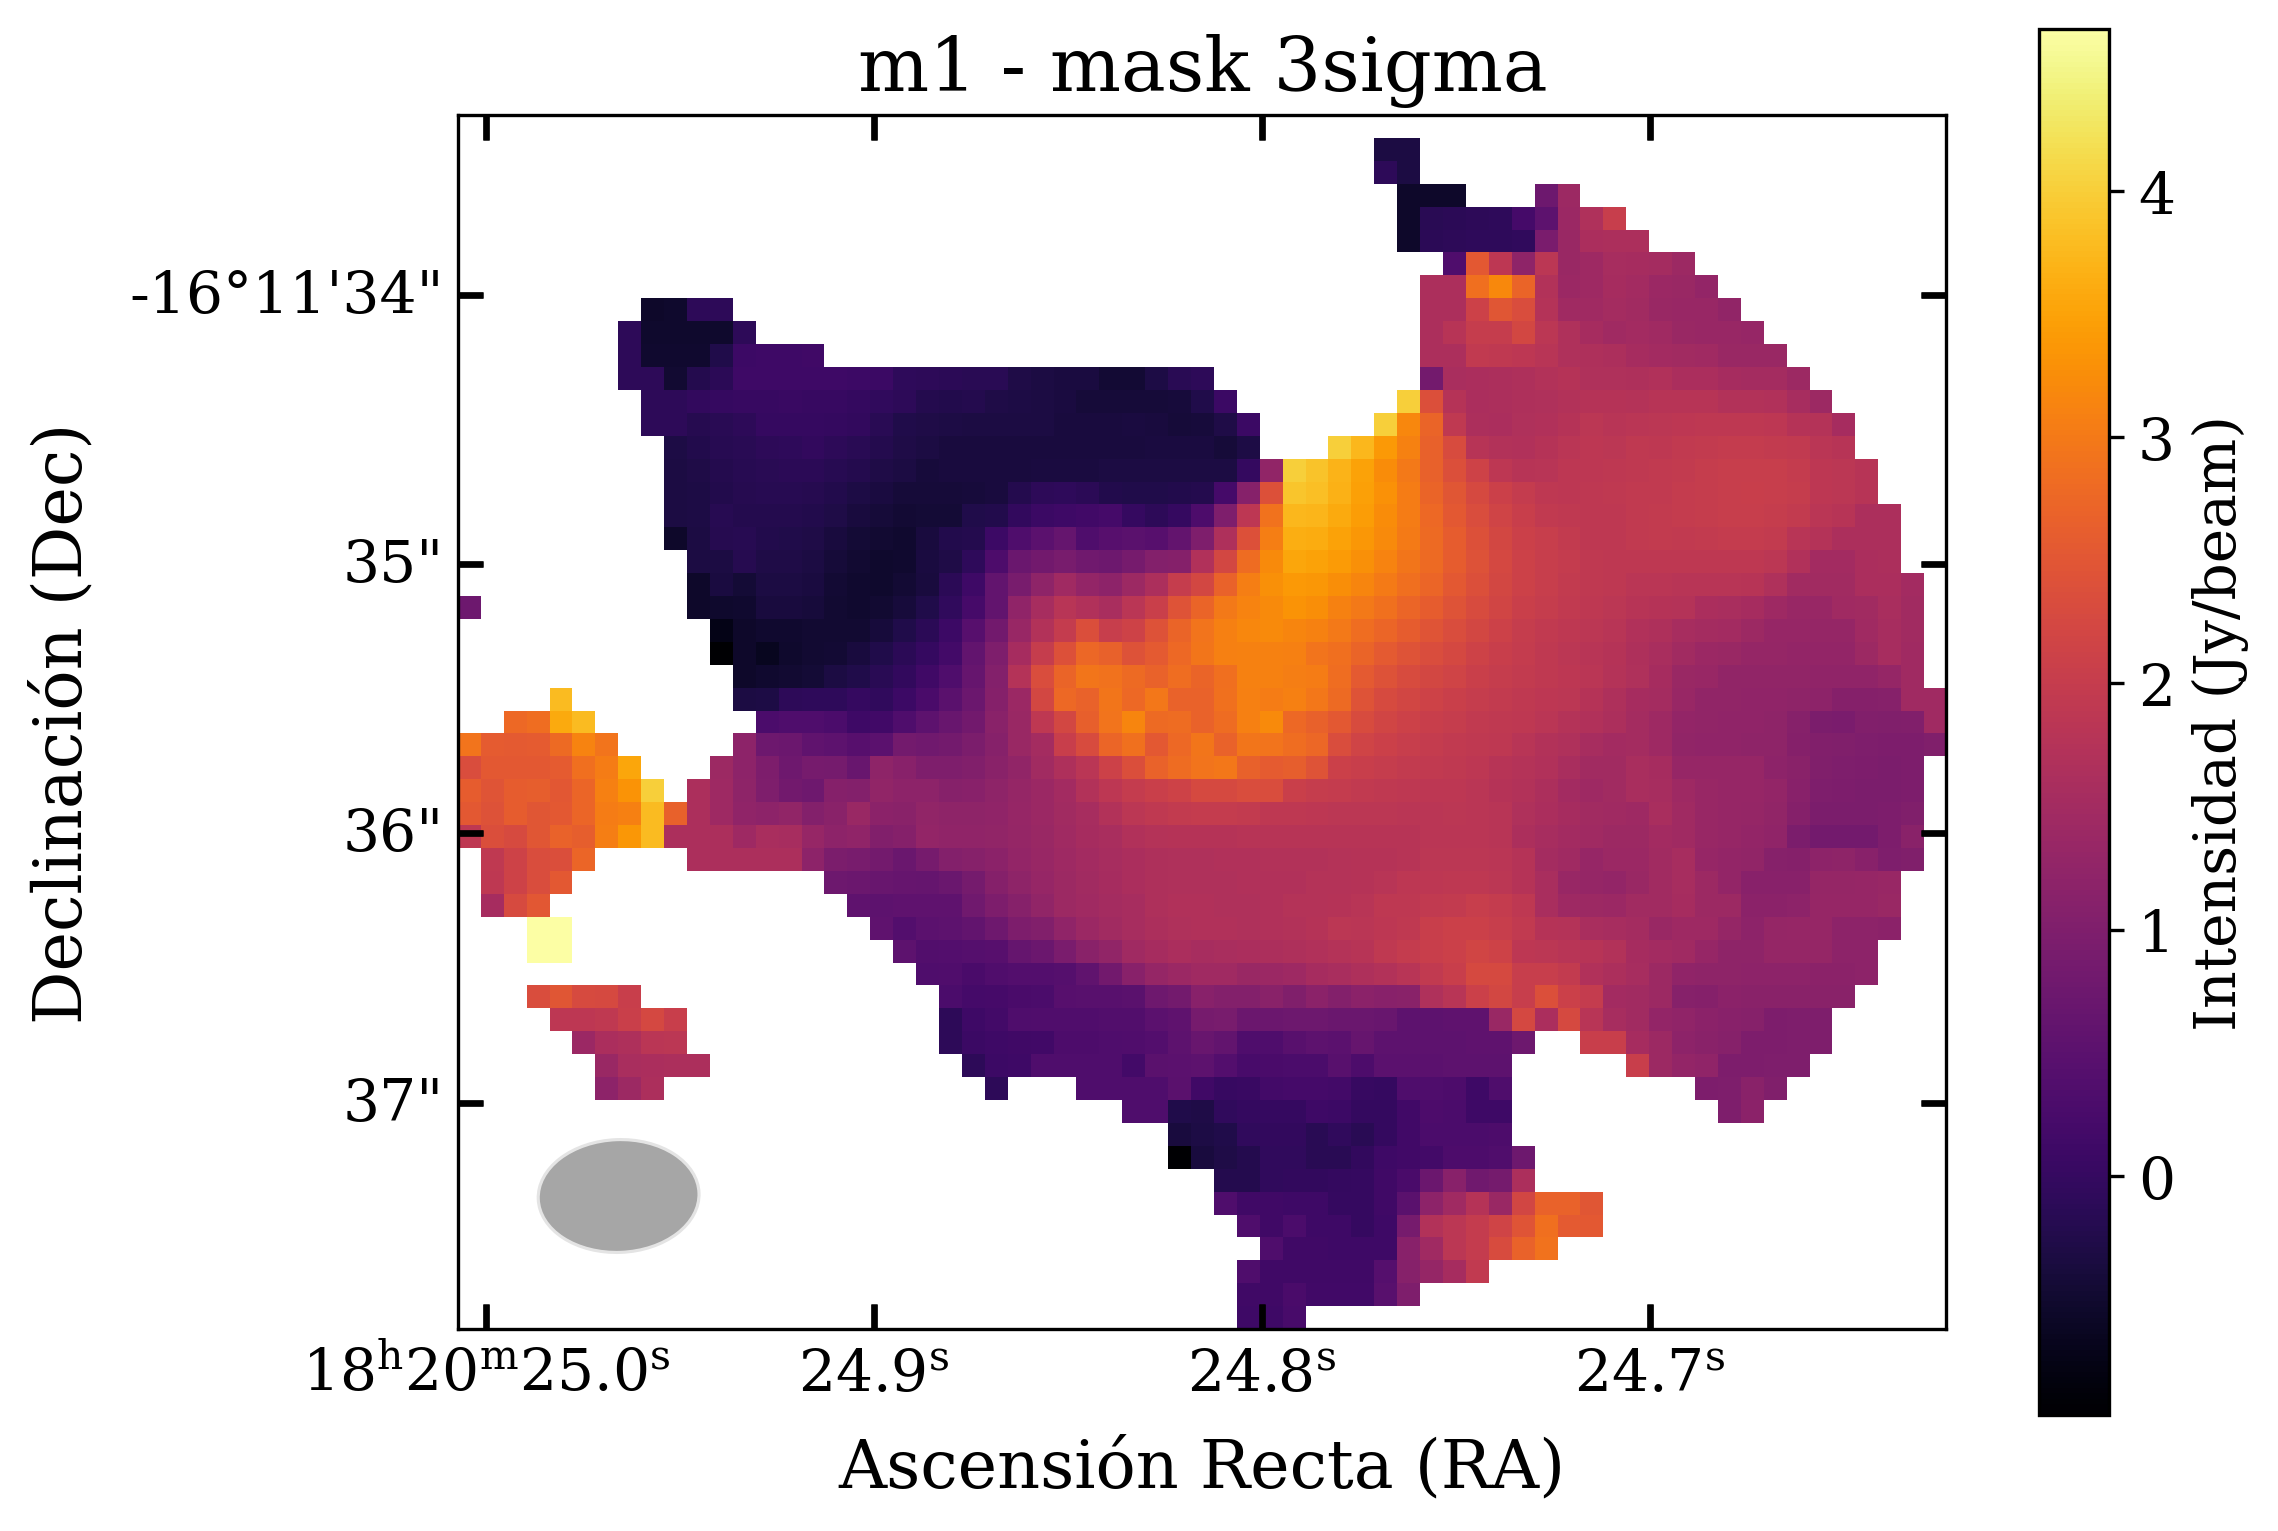

Archivos FITS cerrados.


In [5]:
#t-CH3CH2OH

fits_file = "/home/holman/FILES/M17_P2019/ALMA01669401_m0_nomask_t-CH3CH2OH.fits"
#fits_file = "/home/jennifer/casa/M17_p2015/ALMB00094768_contour.png"
plotter = FITSPlotter(image_fits=fits_file)
plotter.plot(title="m0", object_name="t-CH3CH2OH")

fits_file = "/home/holman/FILES/M17_P2019/ALMA01669401_m1_3sigma_t-CH3CH2OH.fits"
plotter = FITSPlotter(image_fits=fits_file)
plotter.plot(title="m1 - mask 3sigma", object_name="")

plotter.close()

### ALMA01507444:
#### CO
#### SIC2
- $\sigma$ promedio: 0.009753
- 3$\sigma$: 0.02926
- CO: En el cálculo de los momentos se ve un comportamiento que debo preguntar
- SiC2 no hay emisión ni cinemática apreciable en la región

Primeras filas del archivo:
   230.4758638784959  -2.3338820106e-4
0         230.475986         -0.000188
1         230.476108         -0.000745
2         230.476230         -0.000995
3         230.476352         -0.001138
4         230.476474         -0.002134
Columnas en el archivo: Index(['230.4758638784959', '-2.3338820106e-4'], dtype='object')
Máxima intensidad: 1.15832 Jy/beam a 230.51835 GHz


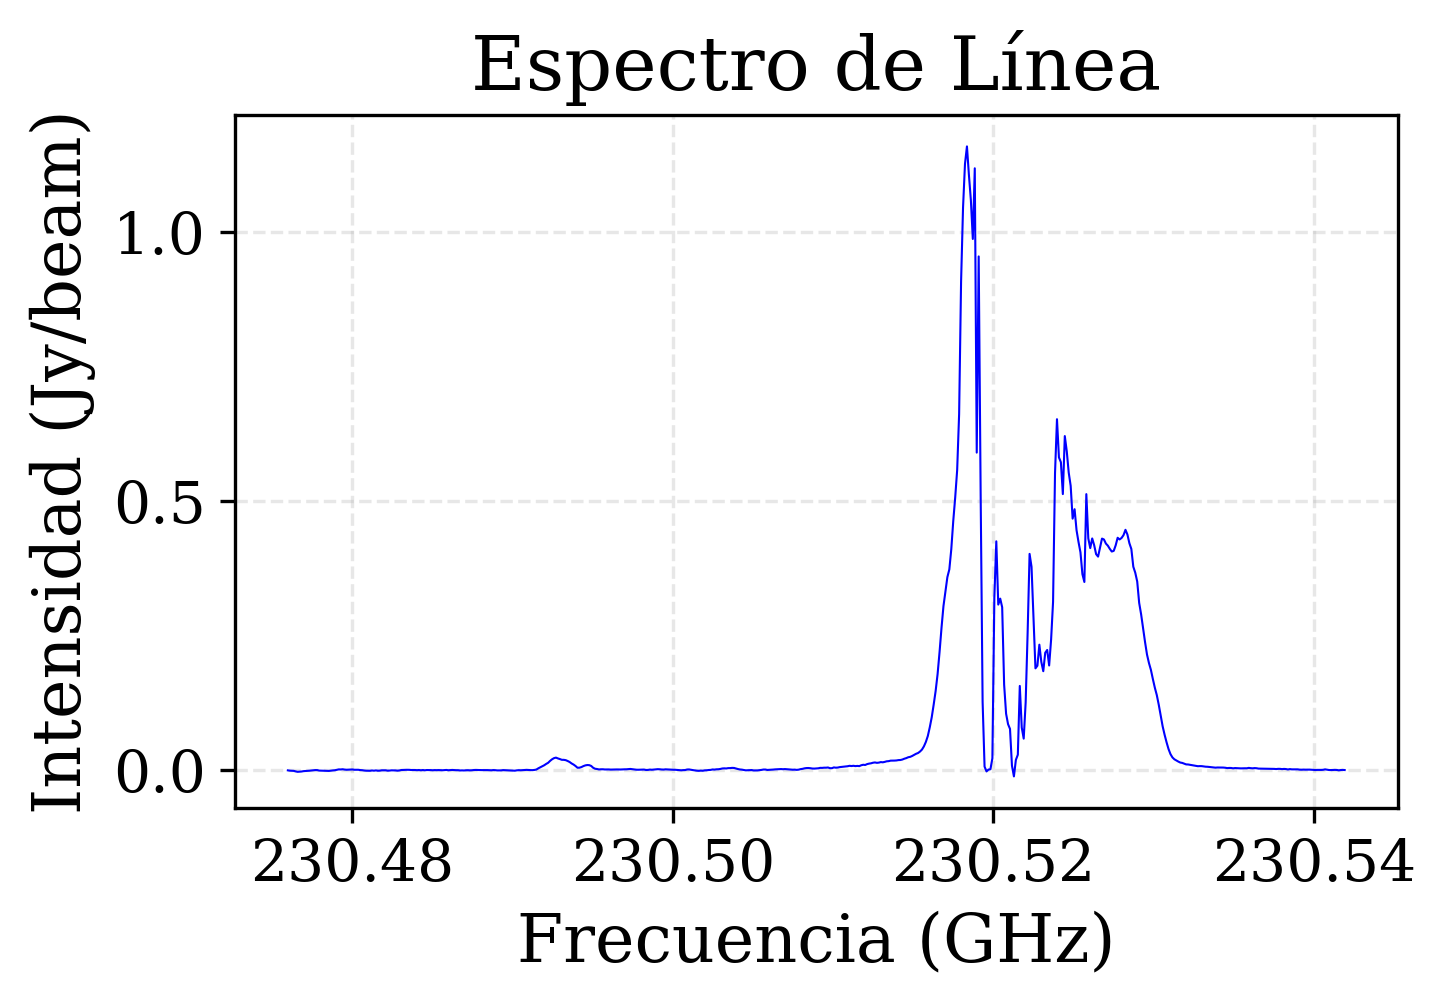

In [6]:
# Ruta del archivo
file_path = "/home/holman/FILES/M17_P2019/ALMA01507444.fits-Z-profile-Region_1-Statistic_Mean-Coordinate_Current-2025-02-17-10-46-54.tsv"

# Cargar el archivo .tsv
spectral_data = pd.read_csv(file_path, sep='\t', comment='#')


# Mostrar las primeras filas del archivo
print("Primeras filas del archivo:")
print(spectral_data.head())

# Verificar las columnas disponibles
print("Columnas en el archivo:", spectral_data.columns)

# Suponiendo que las columnas sean ['Frecuencia', 'Intensidad']
frecuencia = spectral_data.iloc[:, 0]  # Primera columna
intensidad = spectral_data.iloc[:, 1]  # Segunda columna

# Encontrar el valor máximo de intensidad y su frecuencia correspondiente
max_intensidad = intensidad.max()
max_frecuencia = frecuencia[intensidad.idxmax()]
print(f"Máxima intensidad: {max_intensidad:.5f} Jy/beam a {max_frecuencia:.5f} GHz")


# Crear gráfica de frecuencia vs intensidad
plt.figure(figsize=(5, 3))
plt.plot(frecuencia, intensidad, color='blue', linewidth=0.5)
plt.xlabel('Frecuencia (GHz)')
plt.ylabel('Intensidad (Jy/beam)')
plt.title('Espectro de Línea')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


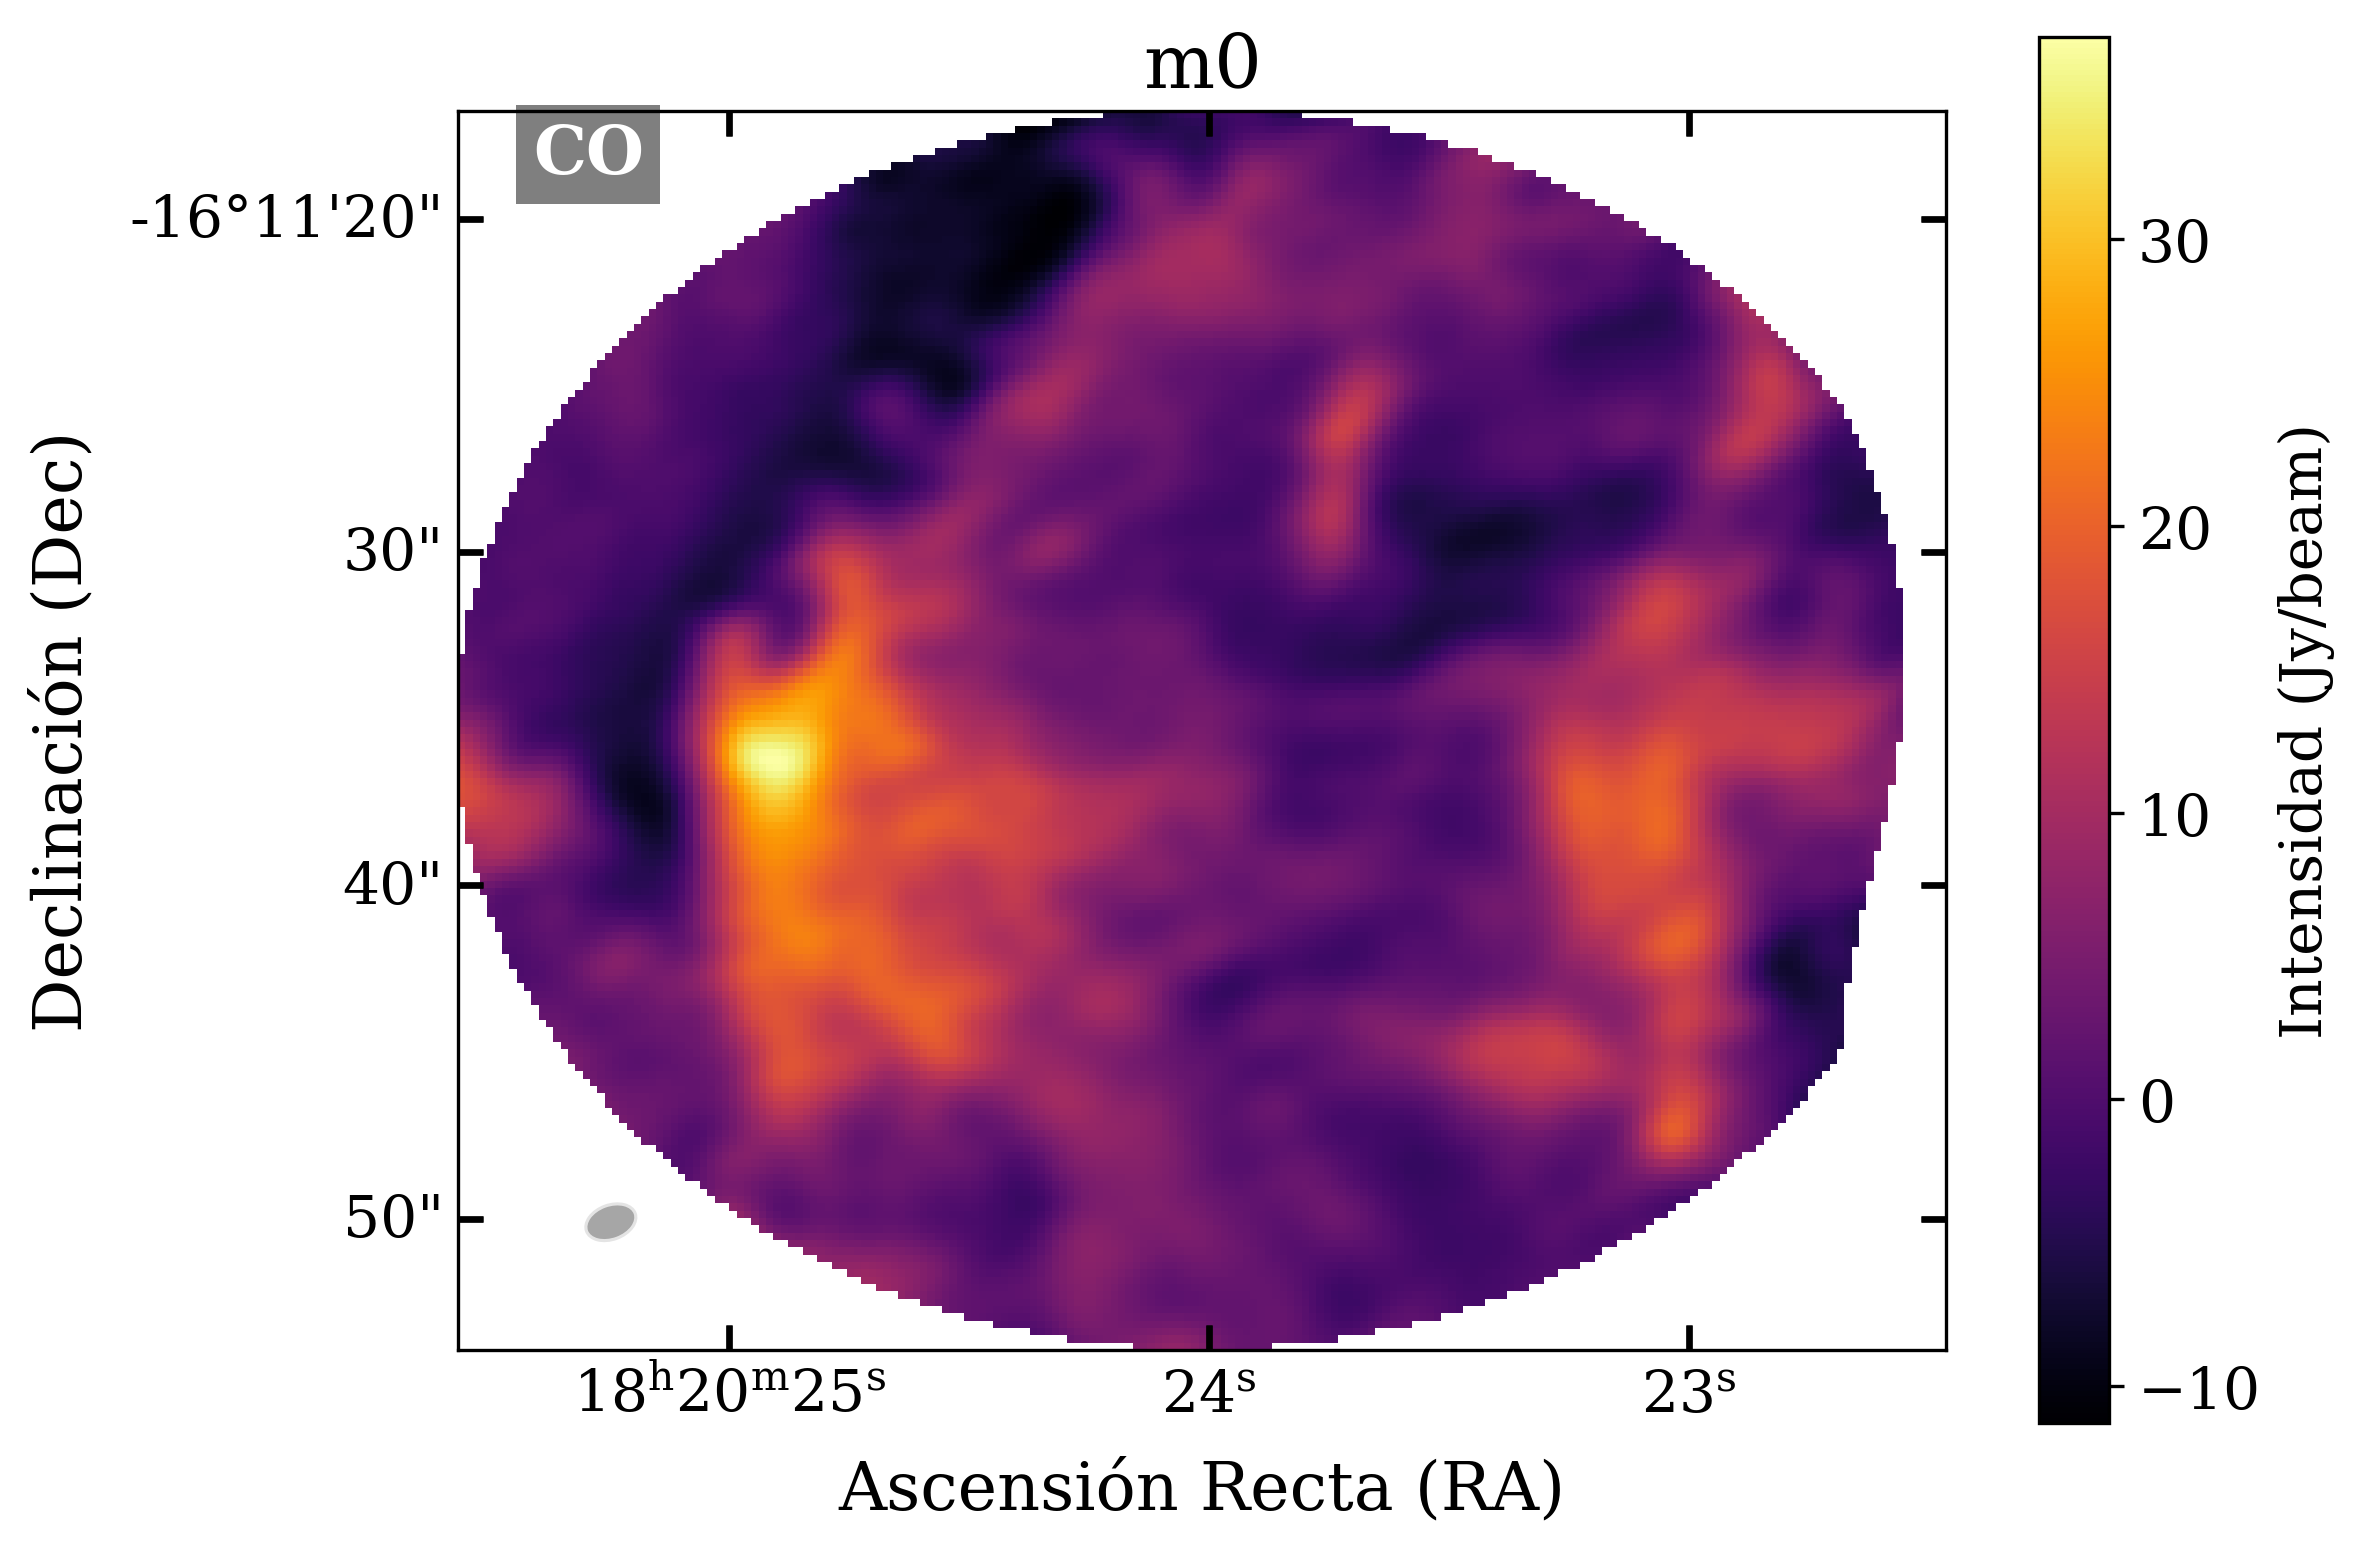

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


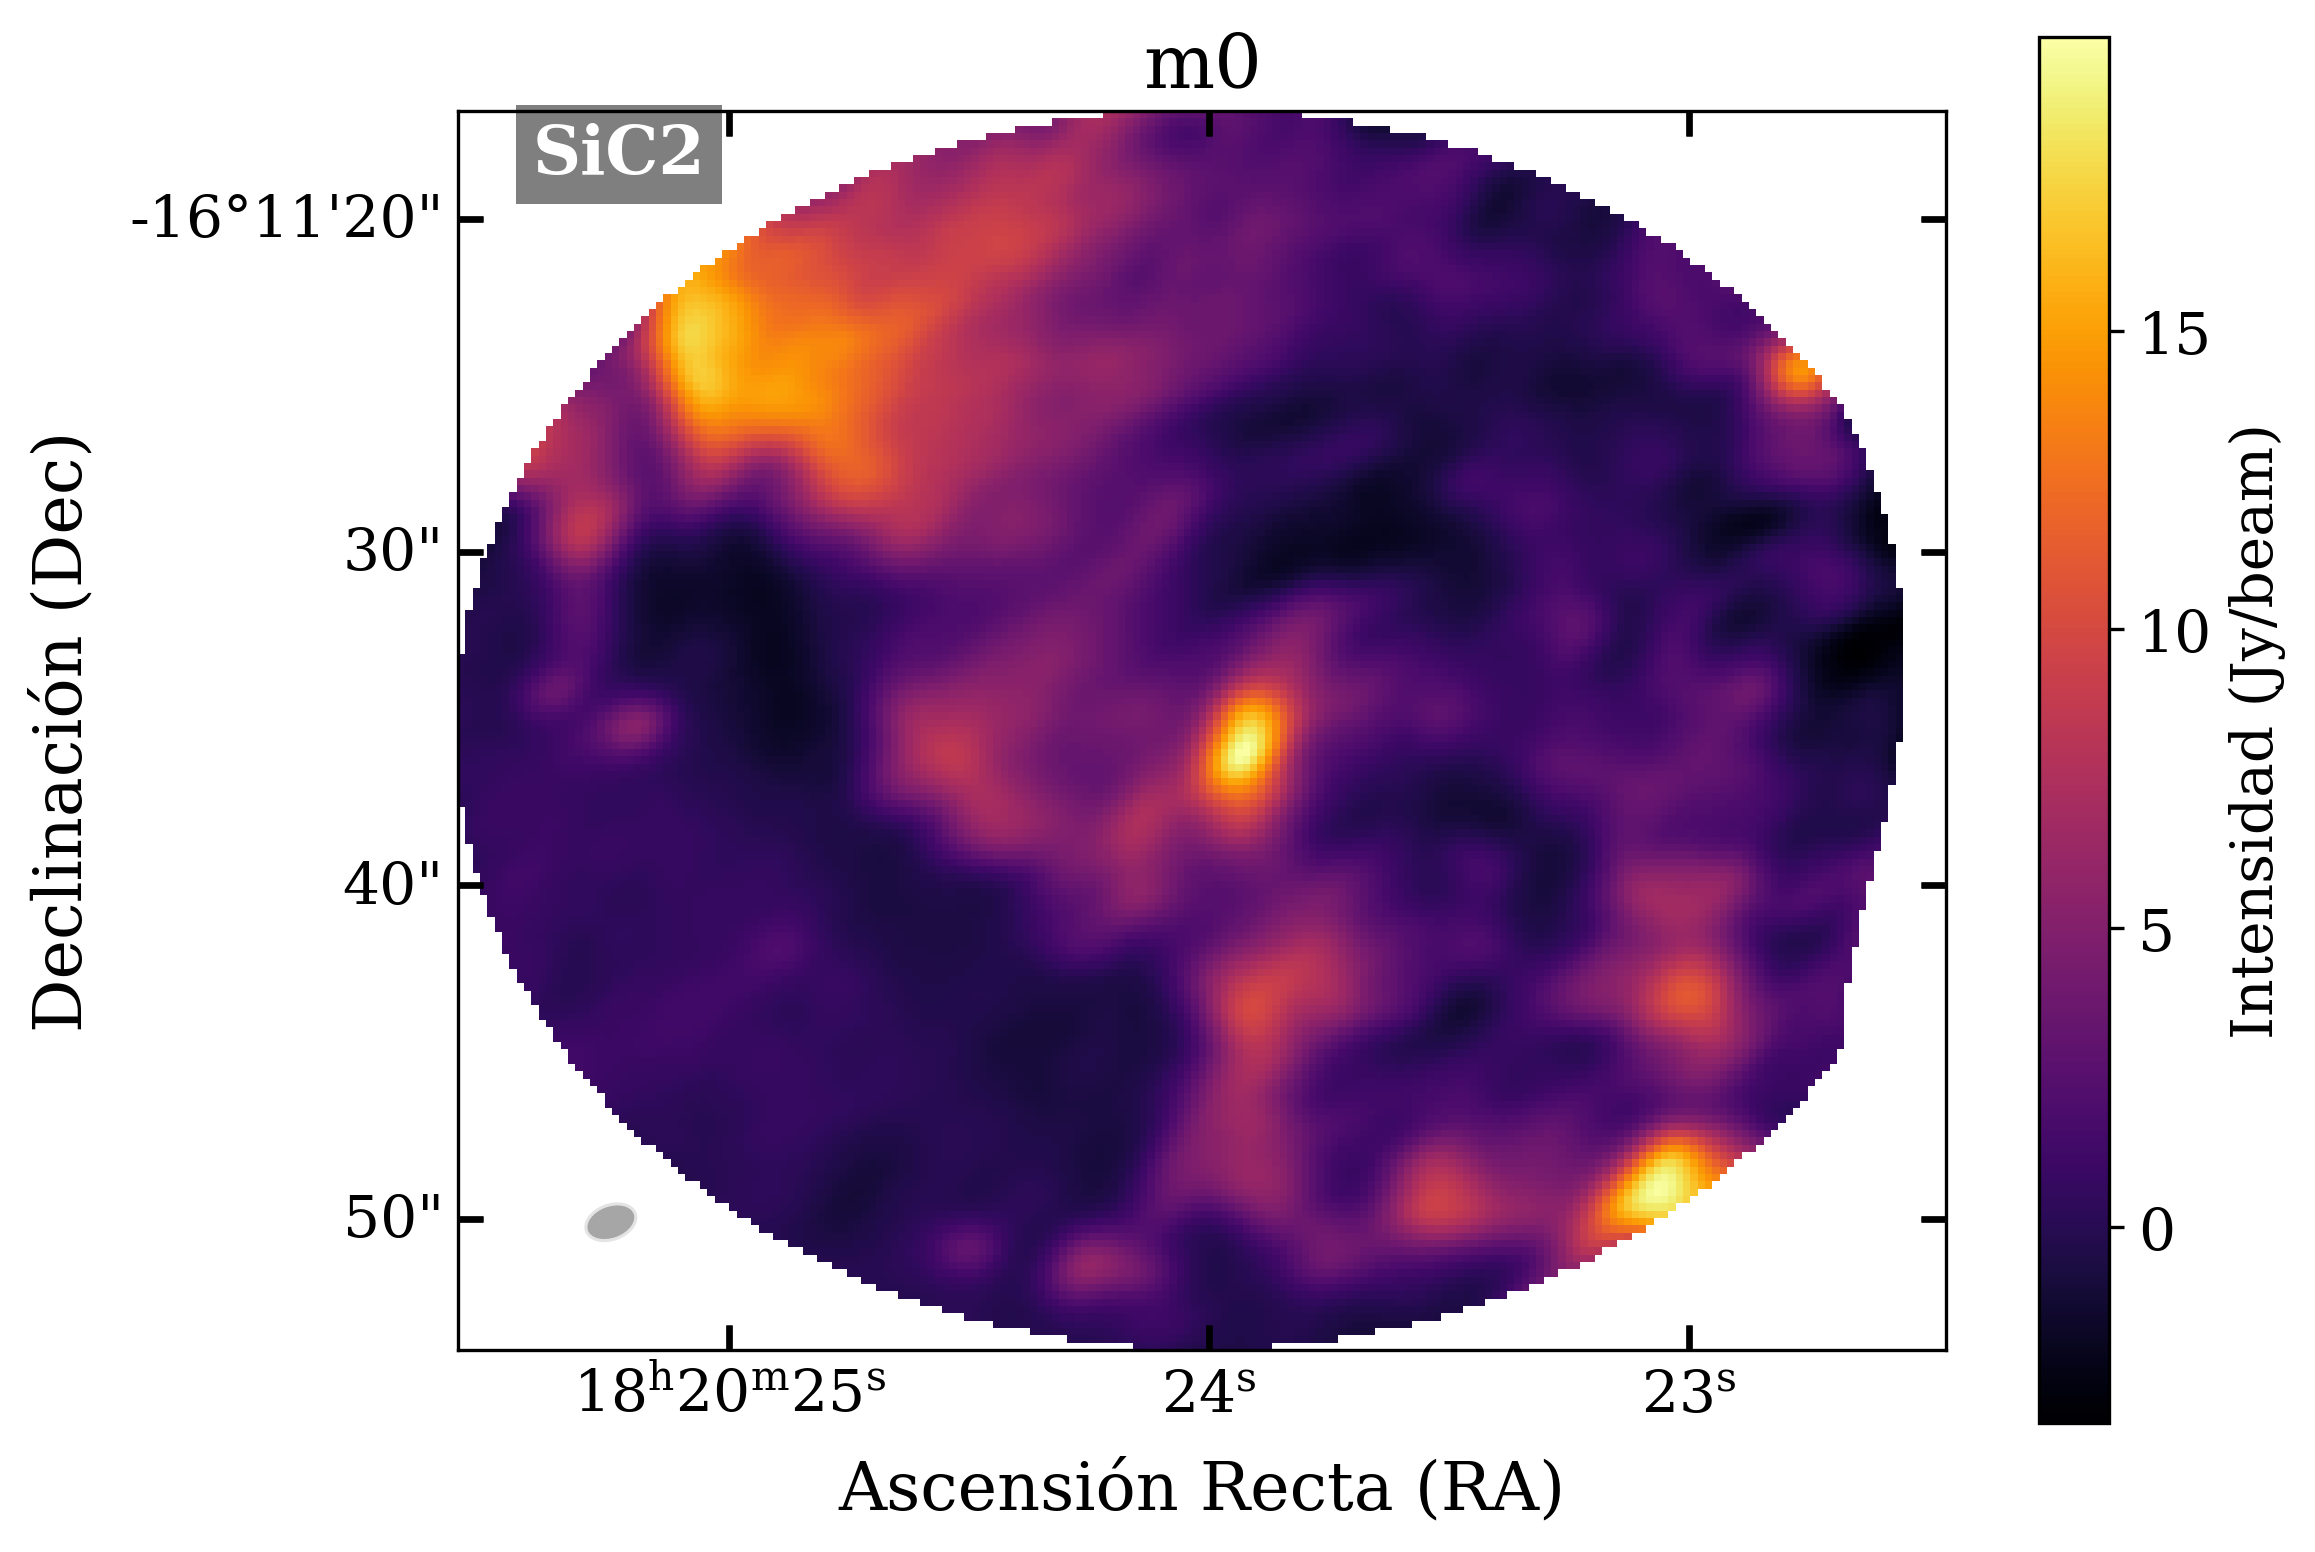

Archivos FITS cerrados.


In [12]:
#34SO2

fits_file = "/home/holman/FILES/M17_P2019/ALMA01507444_m0_nomask_CO.fits"
#fits_file = "/home/jennifer/casa/M17_p2015/ALMB00094768_contour.png"
plotter = FITSPlotter(image_fits=fits_file)
plotter.plot(title="m0", object_name="CO")

fits_file = "/home/holman/FILES/M17_P2019/ALMA01507444_m0_nomask_SiC2.fits"
plotter = FITSPlotter(image_fits=fits_file)
plotter.plot(title="m0", object_name="SiC2")

plotter.close()

### ALMA01586173: Cr

- $\sigma$ promedio: 0.058016
- 3$\sigma$: 0.174049
- No se observa un gradiente de velocidad (preguntar)

Primeras filas del archivo:
   391.32188348600005  2.2831605828e-3
0          391.322372         0.002143
1          391.322860        -0.005747
2          391.323349        -0.005994
3          391.323837        -0.000137
4          391.324325        -0.001913
Columnas en el archivo: Index(['391.32188348600005', '2.2831605828e-3'], dtype='object')
Máxima intensidad: 0.90718 Jy/beam a 391.81952 GHz


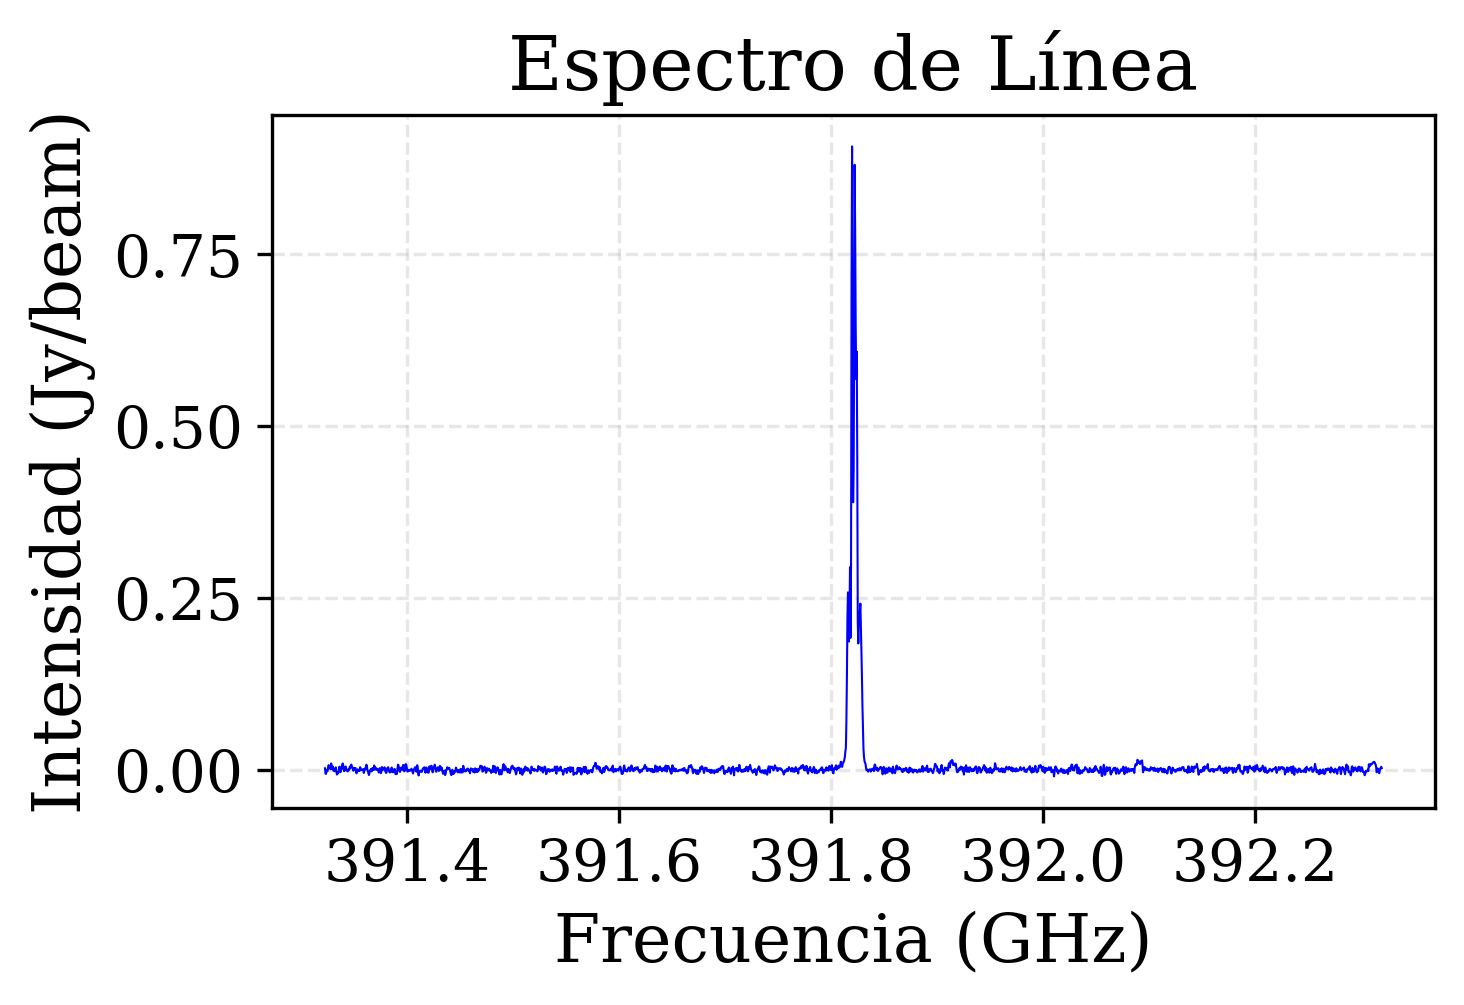

In [15]:
# Ruta del archivo
file_path = "/home/holman/FILES/M17_P2019/ALMA01586173.fits-Z-profile-Region_1-Statistic_Mean-Coordinate_Current-2025-02-17-11-04-15.tsv"

# Cargar el archivo .tsv
spectral_data = pd.read_csv(file_path, sep='\t', comment='#')


# Mostrar las primeras filas del archivo
print("Primeras filas del archivo:")
print(spectral_data.head())

# Verificar las columnas disponibles
print("Columnas en el archivo:", spectral_data.columns)

# Suponiendo que las columnas sean ['Frecuencia', 'Intensidad']
frecuencia = spectral_data.iloc[:, 0]  # Primera columna
intensidad = spectral_data.iloc[:, 1]  # Segunda columna

# Encontrar el valor máximo de intensidad y su frecuencia correspondiente
max_intensidad = intensidad.max()
max_frecuencia = frecuencia[intensidad.idxmax()]
print(f"Máxima intensidad: {max_intensidad:.5f} Jy/beam a {max_frecuencia:.5f} GHz")


# Crear gráfica de frecuencia vs intensidad
plt.figure(figsize=(5, 3))
plt.plot(frecuencia, intensidad, color='blue', linewidth=0.5)
plt.xlabel('Frecuencia (GHz)')
plt.ylabel('Intensidad (Jy/beam)')
plt.title('Espectro de Línea')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


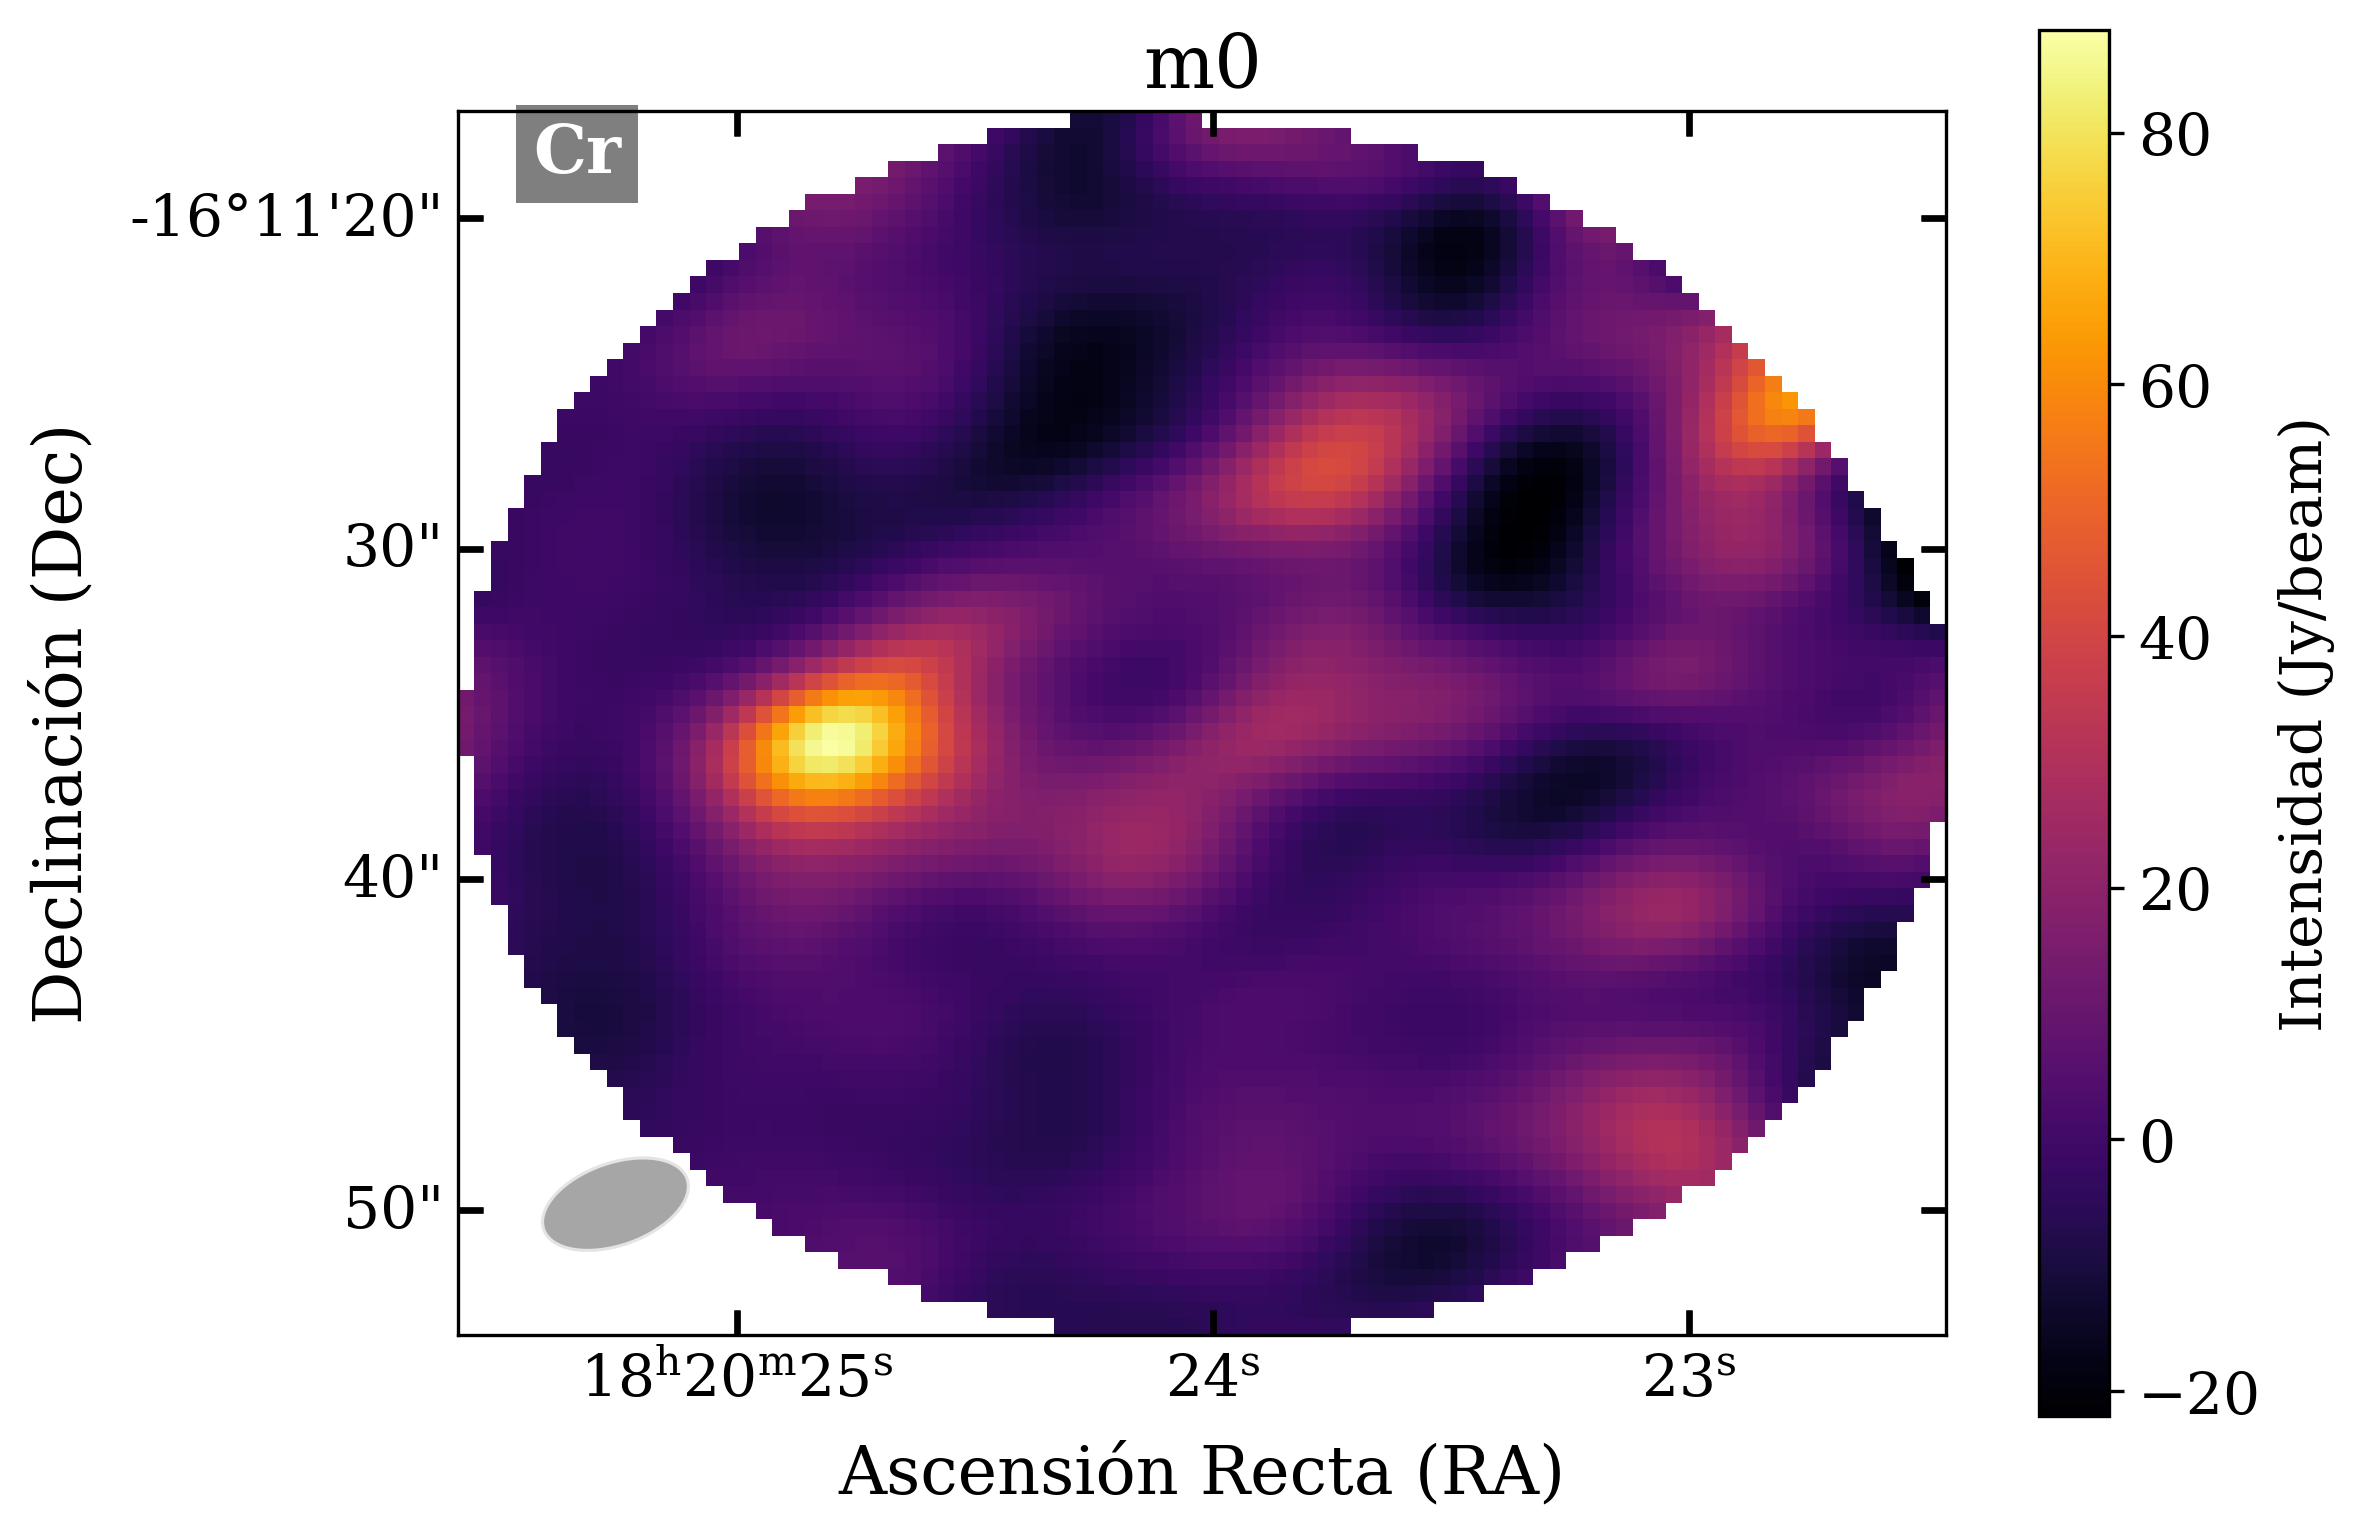

Archivos FITS cerrados.


In [17]:
#34SO2

fits_file = "/home/holman/FILES/M17_P2019/ALMA01586173_m0_nomask_Cr.fits"
#fits_file = "/home/jennifer/casa/M17_p2015/ALMB00094768_contour.png"
plotter = FITSPlotter(image_fits=fits_file)
plotter.plot(title="m0", object_name="Cr")

# fits_file = "/home/holman/FILES/M17_P2019/ALMA01507444_m0_nomask_SiC2.fits"
# plotter = FITSPlotter(image_fits=fits_file)
# plotter.plot(title="m0", object_name="SiC2")

plotter.close()

## Emisión del gas molecular

Las **líneas moleculares** permiten estudiar la estructura y dinámica del gas denso en la UC-HII. Para ello, se realizarán mapas de momentos.


## Emisión del gas ionizado

Las **líneas de recombinación** permiten estudiar la estructura y dinámica del gas ionizado en la UC-HII. Estas líneas trazan la distribución de electrones libres y pueden revelar procesos de expansión, colapso o interacción con el gas molecular circundante.


# **Cálculo de Perfiles de Densidad en M17-UC1 y su Entorno**

## **1. Introducción**
El perfil de densidad describe cómo varía la densidad del gas con la distancia a una fuente central. En el caso de M17-UC1 y su entorno, analizamos tres tipos de muestras:

- **Líneas moleculares de M17-UC1** → Trazan el gas molecular denso.
- **Líneas de recombinación de M17-UC1** → Permiten estudiar el gas ionizado.
- **Muestras de la nube M17SW** → Representan el medio molecular circundante.

## **2. Perfiles de Densidad en el Gas Molecular**
La densidad del gas molecular se estima a partir de la **columna de densidad** $N(\text{H}_2)$, la cual se puede relacionar con la intensidad integrada de las líneas de emisión molecular. Para una línea **ópticamente delgada**, podemos usar:

$$
N(\text{H}_2) = X_{\text{CO}} \times \int T_{\text{mb}} dv
$$

donde:
- $X_{\text{CO}}$ es el factor de conversión de CO a H$_2$, típicamente $ \sim 2 \times 10^{20} $ cm$^{-2}$ K$^{-1}$ km$^{-1}$ s.
- $T_{\text{mb}}$ es la temperatura de brillo de la línea molecular.
- $dv$ es el intervalo de velocidades integrado.

El perfil de densidad se puede estimar dividiendo la columna de densidad entre la distancia $r$:

$$
\rho(r) \propto \frac{N(\text{H}_2)}{r}
$$

En función del mecanismo físico dominante, se esperan diferentes leyes de potencia:

- **Colapso en caída libre** (gravedad dominante):

  $$
  \rho(r) \propto r^{-1.5}
  $$

- **Equilibrio hidrostático** (presión y gravedad en balance):

  $$
  \rho(r) \propto r^{-2}
  $$

## **3. Perfiles de Densidad en el Gas Ionizado**
El gas ionizado en M17-UC1 se analiza a través de **líneas de recombinación** como H$\alpha$ o H$\beta$. La **densidad electrónica** $n_e$ se puede calcular con la relación:

$$
n_e \propto \left( \frac{S_{\nu} \nu^{0.1}}{T_e^{0.5} d^2} \right)^{0.5}
$$

donde:
- $S_{\nu}$ es la intensidad de la emisión libre-libre.
- $\nu$ es la frecuencia de observación.
- $T_e$ es la temperatura electrónica del gas ionizado.
- $d$ es la distancia a la fuente.

Para una UC-HII en expansión libre, se espera un perfil:

$$
n_e(r) \propto r^{-3/2}
$$

Mientras que en equilibrio hidrostático, el perfil es más empinado:

$$
n_e(r) \propto r^{-2}
$$

## **4. Perfiles de Densidad en la Nube M17SW**
Para la nube molecular circundante, la densidad promedio del gas se puede estimar como:

$$
\rho(r) = \frac{M_{\text{gas}}}{\frac{4}{3} \pi R^3}
$$

donde:
- $M_{\text{gas}}$ es la masa total de la nube molecular.
- $R$ es el radio de la región analizada.

Si la UC-HII está impactando la nube, se puede observar un **incremento local de densidad** en los bordes debido a la compresión del gas.

## **5. Conclusión**
Los perfiles de densidad permitirán evaluar la interacción entre M17-UC1 y su entorno:
- Si $ \rho(r) \propto r^{-1.5} $, hay acreción de gas molecular.
- Si $ n_e(r) \propto r^{-3/2} $, la UC-HII está en expansión.
- Si la nube muestra un aumento de densidad cerca de UC1, indica compresión por retroalimentación estelar.

